In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# os libraries
from pathlib import Path
import pickle
import os, glob

# Required Libraries

# Base Python Libraries
import json
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from collections import OrderedDict, Counter
import string
from ast import literal_eval

# Datetime utilities
import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import calendar

#Visualizations
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import matplotlib.dates as mdates

#Natural Language Processing (NLP)

import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation
from joblib import Parallel, delayed
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim
!pip install sentence_transformers
from gensim.models import CoherenceModel
from pprint import pprint
from gensim import corpora
nltk.download('all')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.7 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=cd5f312b894e799133695ac9e46f0e377f7241e0737e64480f9f91c68b57fd48
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
!pip install demoji
import demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.3 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
senwave_japan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets_UK.csv')
print("Length of Senwave Japan Dataset = {}".format(len(senwave_japan)))

<ipython-input-5-3919f1ea82e9>:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  senwave_japan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets_UK.csv')


Length of Senwave Japan Dataset = 16958866


In [6]:
senwave_japan.drop(senwave_japan.columns[0], axis=1, inplace = True)

In [7]:
senwave_japan.head()

,created_at,id,text,user_location
0,Sun Jan 02 04:35:30 +0000 2022,1477498765485375489,We can only hope https://t.co/B4KkrXivxa,"New Westminster, BC"
1,Sun Jan 02 04:35:28 +0000 2022,1477498757126266884,RT @Azodoh: @EricTopol @NEJM Is the protection...,United Kingdom
2,Sun Jan 02 04:35:30 +0000 2022,1477498761605697536,"@firedad065 I understand this, this is where I...","Battle Creek, MI"
3,Sun Jan 02 04:35:33 +0000 2022,1477498775761473542,"RT @WWECreative_ish: ""Our roster is decimated ...","Derby, England"
4,Sun Jan 02 04:35:34 +0000 2022,1477498781880963073,RT @anilkjain61: Don’t dismiss Omicron as ‘mil...,"Manchester, Northwest, UK"


In [8]:
senwave_japan['created_at'] = pd.to_datetime(senwave_japan['created_at'],  errors = 'coerce')

In [9]:
first_wave = senwave_japan[(senwave_japan['created_at'] >= '2020-04-01') & (senwave_japan['created_at'] <= '2021-01-31')].sample(n =10000, random_state = 1)
second_wave = senwave_japan[(senwave_japan['created_at'] >= '2021-03-01') & (senwave_japan['created_at'] < '2021-06-30')].sample(n = 10000, random_state = 1)
third_wave = senwave_japan[(senwave_japan['created_at'] >= '2022-01-01') & (senwave_japan['created_at'] < '2022-02-28')].sample(n = 10000, random_state = 1)

In [10]:
senwave_japan = pd.concat([first_wave, second_wave, third_wave])

print(senwave_japan.shape)

senwave_japan.head()

(30000, 4)


,created_at,id,text,user_location
16338384,2020-05-04 12:37:35+00:00,1257288260222681088.0,#shirtaday todays is another favourite lionsru...,"London, UK"
16875739,2020-08-21 17:27:29+00:00,1296861496690049025,RT @mohsin__s1: Lmao Pakistan did nothing and ...,"Glasgow, Scotland"
16089388,2020-05-01 10:20:23+00:00,1256166569811591168,RT @LiveComedyUK: Welcome to the LCA! Represen...,"Leeds, UK"
16923874,2020-08-21 22:42:04+00:00,1296940661195907079,@PradipBhatiwal You can check the entry requir...,United Kingdom
16011372,2020-04-27 17:38:29+00:00,1254827268544909314,"RT @doctor_oxford: Dear @borisjohnson,\n\n1. T...","Oxford, England"


In [11]:
print(first_wave.shape, second_wave.shape, third_wave.shape)

(10000, 4) (10000, 4) (10000, 4)


In [12]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english') + ['t', 'rt', 'ti', 'vk', 'to', 'co','dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd', 'http', 'https']
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [13]:
senwave_japan = senwave_japan[senwave_japan['user_location'].str.contains('UK|United Kingdom|England|Somerset|Bedford|Bedford|Blackburn with Darwen|Blackpool|Bournemouth|Bracknell Forest|Sandhurst|Brighton|Hove|Bristol|Buckinghamshire|Aylesbury Vale|Aylesbury|Chiltern|Amersham|Chalfont St. Giles|South Bucks|Beaconsfield|Stoke Poges|Wycombe|High Wycombe|Marlow|Cambridgeshire|East Cambridgeshire|Ely|Fenl|Wisbech|Huntingdonshire|Huntingdon|Ramsey|St. Ives|South Cambridgeshire|Cambridge|Central Bedfordshire|Ampthill|Dunstable|Cheshire East|Congleton|Crewe|Knutsford|Macclesfield|Nantwich|Cheshire West Chester|Chester|Northwich|Cornwall|Bodmin|Falmouth|Fowey|Helston|Launceston|Looe|Lostwithiel|Newquay|Penryn|Penzance|St. Austell|Saltash|Tintagel|Truro|Cumbria|Allerdale|Cockermouth|Keswick|Workington|Barrow-in-Furness|Carlisle|Copel|Whitehaven|Eden|Penrith|South Lakel|Grasmere|Kendal|Darlington|Derby|Derbyshire|Amber Valley|Belper|Bolsover|Chesterfield|Derbyshire Dales|Ashbourne|Matlock|Erewash|High Peak|Buxton|North East Derbyshire|South Derbyshire|Repton|Devon|East Devon|Axminster|Exmouth|Sidmouth|Exeter|Mid Devon|Crediton|North Devon|Barnstaple|Lynton Lynmouth|South Hams|Dartmouth|Totnes|Teignbridge|Ashburton|Dawlish|Newton Abbot|Teignmouth|Torridge|Bideford|West Devon|Okehampton|Dorset|Christchurch|East Dorset|Wimborne Minster|North Dorset|Purbeck|Corfe Castle|West Dorset|Dorchester|Lyme Regis|Weymouth Portl|Durham|Barnard Castle|Chester-le-Street|Durham|East Riding of Yorkshire|Beverley|Goole|East Sussex|Eastbourne|Hastings|Lewes|Lewes|Newhaven|Rother|Battle|Bexhill|Rye|Winchelsea|Wealden|Crowborough|Herstmonceux|Pevensey|Essex|Basildon|Braintree|Brentwood|Castle Point|Chelmsford|Colchester|Epping Forest|Chigwell|Harlow|Maldon|Burnham-on-Crouch|Rochford|Tendring|Harwich|Uttlesford|Saffron Walden|Gloucestershire|Cheltenham|Cotswold|Cirencester|Forest of Dean|Gloucester|Stroud|Tewkesbury|Tewkesbury|Winchcombe|Greater London|Inner London|Camden|Bloomsbury|City of London|Smithfield|City of Westminster|Charing Cross|St. Marylebone|Soho|Hackney|Hammersmith Fulham|Haringey|Islington|Clerkenwell|Kensington Chelsea|Lambeth|Vauxhall|Lewisham|Newham|Southwark|Dulwich|Tower Hamlets|Limehouse|Wandsworth|Battersea|Outer London|Barking Dagenham|Barnet|Bexley|Brent|Bromley|Croydon|Ealing|Enfield|Greenwich|Woolwich|Harrow|Havering|Hillingdon|Hounslow|Kingston upon Thames|Merton|Wimbledon|Redbridge|Richmond upon Thames|Teddington|Sutton|Waltham Forest|Greater Manchester|Bolton|Bury|Manchester|Oldham|Rochdale|Salford|Stockport|Tameside|Trafford|Wigan|Atherton|Halton|Runcorn|Widnes|Hampshire|Basingstoke Deane|Silchester|East Hampshire|Alton|Eastleigh|Fareham|Gosport|Hart|Havant|New Forest|Rushmoor|Test Valley|Andover|Romsey|Winchester|Hartlepool|Herefordshire|Hereford|Leominster|Ross-on-Wye|Hertfordshire|Broxbourne|Dacorum|Berkhamsted|Hemel Hempstead|East Hertfordshire|Bishop’s Stortford|Hertford|Ware|Hertsmere|North Hertfordshire|Letchworth|St. Albans|Stevenage|Three Rivers|Watford|Welwyn Hatfield|Hatfield|Welwyn Garden City|Isle of Wight|Carisbrooke|Cowes|Freshwater|Newport|Ryde|Ventnor|Isles of Scilly|Hugh Town|Kent|Ashford|Canterbury|Herne Bay|Whitstable|Dartford|Dover|Deal|Dover|Sandwich|Gravesham|Gravesend|Maidstone|Sevenoaks|Edenbridge|Shepway|Folkestone|Hythe|Lydd|New Romney|Swale|Faversham|Thanet|Broadstairs St. Peter’s|Margate|Ramsgate|Tonbridge Malling|Tunbridge Wells|Royal Tunbridge Wells|Kingston upon Hull|Lancashire|Burnley|Chorley|Fylde|Hyndburn|Lancaster|Pendle|Preston|Walton-le-Dale|Ribble Valley|Rossendale|South Ribble|West Lancashire|Skelmersdale|Wyre|Leicester|Leicestershire|Blaby|Charnwood|Loughborough|Harborough|Market Harborough|Hinckley Bosworth|Melton|North West Leicestershire|Oadby Wigston|Lincolnshire|Boston|East Lindsey|Lincoln|North Kesteven|South Kesteven|Grantham|Stamford|South Holl|Crowl|West Lindsey|Gainsborough|Luton|Medway|Chatham|Gillingham|Rochester|Merseyside|Knowsley|Huyton|Liverpool|St. Helens|Sefton|Southport|Wirral|Birkenhead|Middlesbrough|Milton Keynes|Norfolk|Breckl|East Dereham|Thetford|Broadl|Great Yarmouth|King’s Lynn West Norfolk|Castle Rising|King’s Lynn|Sandringham|North Norfolk|Norwich|South Norfolk|North East Lincolnshire|Cleethorpes|Grimsby|North Lincolnshire|Scunthorpe|North Somerset|Weston-super-Mare|North Yorkshire|Craven|Hambleton|Northallerton|Harrogate|Knaresborough|Ripon|Richmondshire|Richmond|Ryedale|Malton|Scarborough|Whitby|Selby|Northamptonshire|Corby|Daventry|East Northamptonshire|Oundle|Kettering|Northampton|South Northamptonshire|Wellingborough|Northumberl|Bamburgh|Bedlington|Cramlington|Hexham|Morpeth|Warkworth|Nottingham|Nottinghamshire|Ashfield|Bassetlaw|Worksop|Broxtowe|Beeston Stapleford|Gedling|Mansfield|Newark Sherwood|Newark-on-Trent|Rushcliffe|West Bridgford|Oxfordshire|Cherwell|Banbury|Bicester|Oxford|South Oxfordshire|Henley-on-Thames|Vale of White Horse|Wantage|West Oxfordshire|Burford|Peterborough|Plymouth|Poole|Portsmouth|Reading|Redcar Clevel|Rutl|Uppingham|Shropshire|Bridgnorth|Ludlow|Much Wenlock|Oswestry|Shrewsbury|Stokesay|Slough|Somerset|Mendip|Glastonbury|Wells|Sedgemoor|Bridgwater|Cheddar|South Somerset|Ilchester|Langport|Taunton Deane|Taunton|Wellington|West Somerset|Dunster|Minehead|South Gloucestershire|Badminton|Kingswood|South Yorkshire|Barnsley|Doncaster|Adwick le Street|Rotherham|Sheffield|Southampton|Southend-on-Sea|Staffordshire|Cannock Chase|East Staffordshire|Burton upon Trent|Lichfield|Newcastle-under-Lyme|South Staffordshire|Stafford|Staffordshire Moorlands|Tamworth|Stockton-on-Tees|Stoke-on-Trent|Suffolk|Babergh|Sudbury|Forest Heath|Mildenhall|Newmarket|Ipswich|Mid Suffolk|St. Edmundsbury|Bury St. Edmunds|Suffolk Coastal|Dunwich|Felixstowe|Woodbridge|Waveney|Beccles|Lowestoft|Surrey|Elmbridge|Epsom Ewell|Guildford|Mole Valley|Dorking|Reigate Banstead|Runnymede|Spelthorne|Staines|Surrey Heath|Tandridge|Waverley|Haslemere|Woking|Swindon|Telford Wrekin|Telford|Thurrock|Tilbury|Torbay|Brixham|Tyne Wear|Gateshead|Felling (ward)|Newcastle upon Tyne|Newburn|North Tyneside|Wallsend|South Tyneside|Jarrow|South Shields|Sunderl|Washington|Warrington|Warwickshire|North Warwickshire|Nuneaton Bedworth|Bedworth|Rugby|Stratford-on-Avon|Warwick|Royal Leamington Spa|Warwick|West Berkshire|Newbury|West Midlands|Birmingham|Coventry|Dudley|Sandwell|West Bromwich|Solihull|Walsall|Wolverhampton|West Sussex|Adur|Shoreham-by-Sea|Arun|Arundel|Bognor Regis|Chichester|Petworth|Crawley|Horsham|Mid Sussex|East Grinstead|Worthing|West Yorkshire|Bradford|Haworth|Keighley|Saltaire|Calderdale|Halifax|Todmorden|Kirklees|Dewsbury|Huddersfield|Leeds|Wakefield|Pontefract|Wiltshire|Amesbury|Bradford-on-Avon|Chippenham|Cricklade|Devizes|Malmesbury|Marlborough|Salisbury|Trowbridge|Westbury|Wilton|Windsor Maidenhead|Ascot|Bray|Eton|Maidenhead|Windsor|Wokingham|Worcestershire|Bromsgrove|Malvern Hills|Great Malvern|Redditch|Worcester|Wychavon|Broadway|Droitwich|Evesham|Wyre Forest|Kidderminster|York|Northern Ireland|Antrim Newtownabbey|Antrim|Newtownabbey|Ards North Down|Newtownards|Bangor|Armagh, Banbridge, Craigavon|Armagh|Banbridge|Dromore|Craigavon|Lurgan|Belfast|Stormont|Causeway Coast Glens|Ballycastle|Ballymoney|Coleraine|Portrush|Limavady|Derry Strabane|Londonderry|Strabane|Fermanagh Omagh|Enniskillen|Omagh|Lisburn Castlereagh|Lisburn|Antrim|Ballymena|Carrickfergus|Larne|Ulster|Cookstown|Dungannon|Magherafelt|Newry Mourne Down|Downpatrick|Kilkeel|Newcastle|Newry|Scotland|Aberdeen|Aberdeenshire|Banff|Braemar|Cruden Bay|Peterhead|St. Fergus|Angus|Arbroath|Brechin|Forfar|Glamis|Montrose|Argyll Bute|Campbeltown|Dunoon|Inveraray|Lochgilphead|Rothesay|Tarbert|Clackmannanshire|Dumfries Galloway|Dumfries|Gretna Green|Kirkcudbright|Lochmaben|Whithorn|Dundee|East Ayrshire|Cumnock|Kilmarnock|Mauchline|East Dunbartonshire|Kirkintilloch|Milngavie|East Lothian|Dunbar|Haddington|East Renfrewshire|Edinburgh|Leith|Falkirk|Falkirk|Grangemouth|Fife|Buckhaven|Culross|Cupar|Dunfermline|Glenrothes|Kirkcaldy|Rosyth|St. Andrews|Glasgow|Highl|Alness|Cawdor|Cromarty|Fort William|Invergordon|Inverness|John o’Groats|Nigg|Thurso|Wick|Inverclyde|Greenock|Midlothian|Dalkeith|Moray|Elgin|Forres|Lossiemouth|North Ayrshire|Irvine|North Lanarkshire|Coatbridge|Cumbernauld|Motherwell Wishaw|Orkney Islands|Kirkwall|Perth Kinross|Dunkeld|Kinross|Perth|Scone|Renfrewshire|Paisley|Renfrew|Scottish Borders|Coldstream|Duns|Galashiels|Hawick|Jedburgh|Kelso|Melrose|Newtown St. Boswells|Peebles|Selkirk|ShetlIslands|Lerwick|Sullom Voe|South Ayrshire|Ayr|Alloway|Prestwick|South Lanarkshire|East Kilbride|Hamilton|Lanark|Stirling|Balquhidder|Bannockburn|Callander|Stirling|West Dunbartonshire|Clydebank|Dumbarton|West Lothian|Linlithgow|Livingston|Western Isles|Stornoway|Wales|Blaenau Gwent|Abertillery|Ebbw Vale|Bridgend|Bridgend|Porthcawl|Caerphilly|Caerphilly|Gelligaer|Cardiff|Llandaff|Carmarthenshire|Carmarthen|Llanelli|Ceredigion|Aberystwyth|Cardigan|Conwy|Colwyn Bay|Conwy|Llandudno|Denbighshire|Denbigh|Rhyl|St. Asaph|Flintshire|Hawarden|Holywell|Gwynedd|Bala|Bangor|Caernarfon|Harlech|Isle of Anglesey|Holyhead|Llangefni|Merthyr Tydfil|Monmouthshire|Abergavenny|Chepstow|Monmouth|Usk|Neath Port Talbot|Margam|Neath|Pontardawe|Port Talbot|Newport|Caerleon|Pembrokeshire|Haverfordwest|Milford Haven|Pembroke|St. David’s|Tenby|Powys|Brecon|Builth Wells|Llandrindod Wells|Montgomery|Newtown|Welshpool|Rhondda Cynon Taf|Aberdare|Hirwaun|Llantrisant|Mountain Ash|Pontypridd|Swansea|Swansea|Torfaen|Cwmbrân|Pontypool|Vale of Glamorgan|Barry|Cowbridge|Llantwit Major|Wrexham|Wrexham')==True]

<ipython-input-13-d327bdcd918e>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  senwave_japan = senwave_japan[senwave_japan['user_location'].str.contains('UK|United Kingdom|England|Somerset|Bedford|Bedford|Blackburn with Darwen|Blackpool|Bournemouth|Bracknell Forest|Sandhurst|Brighton|Hove|Bristol|Buckinghamshire|Aylesbury Vale|Aylesbury|Chiltern|Amersham|Chalfont St. Giles|South Bucks|Beaconsfield|Stoke Poges|Wycombe|High Wycombe|Marlow|Cambridgeshire|East Cambridgeshire|Ely|Fenl|Wisbech|Huntingdonshire|Huntingdon|Ramsey|St. Ives|South Cambridgeshire|Cambridge|Central Bedfordshire|Ampthill|Dunstable|Cheshire East|Congleton|Crewe|Knutsford|Macclesfield|Nantwich|Cheshire West Chester|Chester|Northwich|Cornwall|Bodmin|Falmouth|Fowey|Helston|Launceston|Looe|Lostwithiel|Newquay|Penryn|Penzance|St. Austell|Saltash|Tintagel|Truro|Cumbria|Allerdale|Cockermouth|Keswick|Workington|Barrow-in-Furness|Carlisl

In [14]:
senwave_japan

,created_at,id,text,user_location
16338384,2020-05-04 12:37:35+00:00,1257288260222681088.0,#shirtaday todays is another favourite lionsru...,"London, UK"
16875739,2020-08-21 17:27:29+00:00,1296861496690049025,RT @mohsin__s1: Lmao Pakistan did nothing and ...,"Glasgow, Scotland"
16089388,2020-05-01 10:20:23+00:00,1256166569811591168,RT @LiveComedyUK: Welcome to the LCA! Represen...,"Leeds, UK"
16923874,2020-08-21 22:42:04+00:00,1296940661195907079,@PradipBhatiwal You can check the entry requir...,United Kingdom
16011372,2020-04-27 17:38:29+00:00,1254827268544909314,"RT @doctor_oxford: Dear @borisjohnson,\n\n1. T...","Oxford, England"
...,...,...,...,...
16496,2022-01-02 09:23:53+00:00,1477571336776130563,RT @BBCNews: Covid booster 88% effective again...,Northern Ireland
86103,2022-01-02 17:36:01+00:00,1477695187656785922,"Just uploaded ""Lockdown Radio UK Live"" to @mix...","London, England"
133059,2022-01-02 23:19:01+00:00,1477781505267093507,"Remote communities locking down, banning outsi...","Hamilton, Ontario"
74723,2022-01-02 16:16:24+00:00,1477675149914783746,"RT @ChrisCEOHopson: Another, new, update threa...",Plymouth U.K.


In [15]:
words = clean(''.join(str(senwave_japan['text'].tolist())))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(year, ago)'),
  Text(0, 1, '(new, year)'),
  Text(0, 2, '(tested, positive)'),
  Text(0, 3, '(long, covid)'),
  Text(0, 4, '(last, year)'),
  Text(0, 5, '(public, health)'),
  Text(0, 6, '(care, home)'),
  Text(0, 7, '(covid, death)'),
  Text(0, 8, '(covid, vaccine)'),
  Text(0, 9, '(covid, 19)'),
  Text(0, 10, '(covid19, vaccine)'),
  Text(0, 11, '(social, distancing)'),
  Text(0, 12, '(vaccine, passport)'),
  Text(0, 13, '(wear, mask)'),
  Text(0, 14, '(boris, johnson)')])

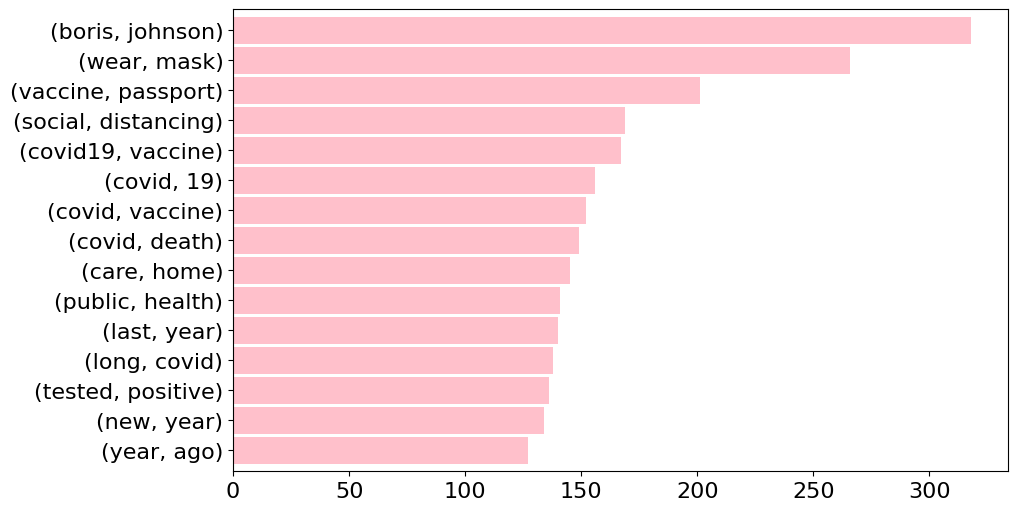

In [16]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'pink', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(put, adequate, ventilation)'),
  Text(0, 1, '(adequate, ventilation, every)'),
  Text(0, 2, '(ventilation, every, school)'),
  Text(0, 3, '(marjorie, taylor, greene)'),
  Text(0, 4, '(intubated, another, terrified)'),
  Text(0, 5, '(told, hernnyou, currently)'),
  Text(0, 6, '(evening, told, hernnyou)'),
  Text(0, 7, '(patient, evening, told)'),
  Text(0, 8, '(covid, patient, evening)'),
  Text(0, 9, '(younger, covid, patient)'),
  Text(0, 10, '(terrified, younger, covid)'),
  Text(0, 11, '(another, terrified, younger)'),
  Text(0, 12, '(hernnyou, currently, surrounded)'),
  Text(0, 13, '(grahamcarlos, intubated, another)'),
  Text(0, 14, '(tested, positive, covid)')])

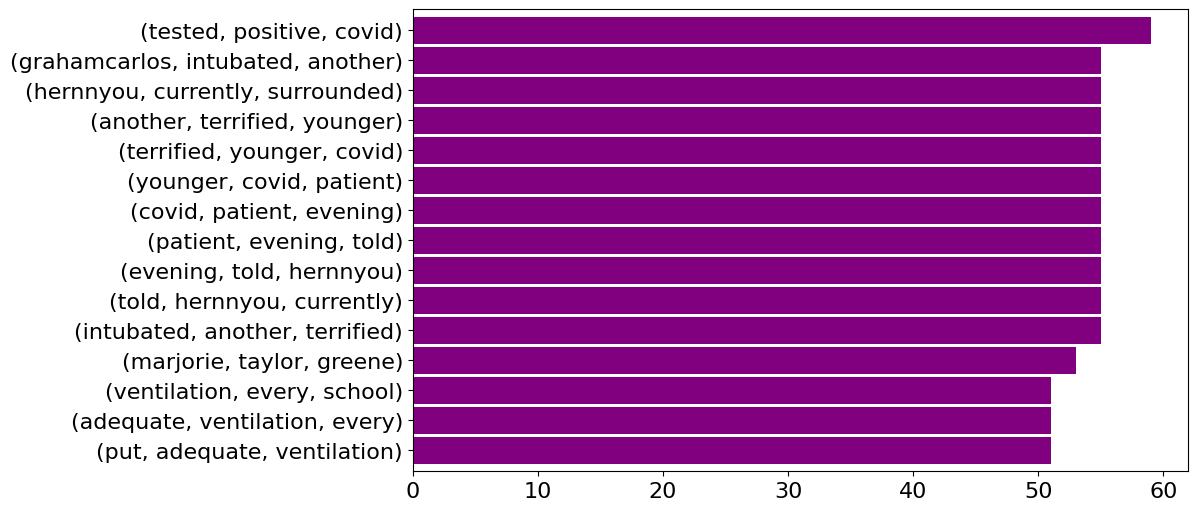

In [17]:
trigrams_series.sort_values().plot.barh(color = 'purple', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [18]:
contractions = {
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

In [19]:
contractionsWithAnotherInvertedComma = {
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

In [20]:
class preprocess():
    def __init__(self, df, contractions, otherContractions):
        self.df = df
        self.contractions = contractions
        self.otherContractions = otherContractions

    def lower(self, tweet):
        return tweet.lower()

    def expand(self, tweet):
        for word in tweet.split():
            if word in self.contractions.keys():
                tweet = tweet.replace(word, self.contractions[word])
            elif word in self.otherContractions.keys():
                tweet = tweet.replace(word, self.otherContractions[word])
        return tweet

    def emoji2text(self, tweet):
        emojis = demoji.findall(tweet)
        new_tweet = []
        for word in tweet.split():
            if word in emojis.keys():
                tweet = tweet.replace(word, emojis[word])
                new_tweet.append(emojis[word])
            wordmojis = demoji.findall(word)
            for char in word:
                if char in wordmojis.keys():
                    tweet = tweet.replace(word, wordmojis[char])

        return tweet

    def remove_hashtags(self, tweet):
        return re.sub(r'\#w+', '', tweet)

    def remove_mentions(self, tweet):
        for word in tweet.split():
            if word[0] == '@':
                tweet = tweet.replace(word, '')
        return tweet

    def remove_punctuations(self, tweet):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')
        return tweet.translate(trantab)

    def preprocess_tweet(self, tweet):
        tweet = str(tweet).lower()
        tweet = self.expand(tweet)
        tweet = self.emoji2text(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.remove_hashtags(tweet)
        tweet = self.remove_punctuations(tweet)
        return tweet

In [21]:
pp_class = preprocess(senwave_japan, contractions, contractionsWithAnotherInvertedComma)
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : pp_class.preprocess_tweet(x))

In [22]:
senwave_japan

,created_at,id,text,user_location
16338384,2020-05-04 12:37:35+00:00,1257288260222681088.0,shirtaday todays is another favourite lionsru...,"London, UK"
16875739,2020-08-21 17:27:29+00:00,1296861496690049025,rt lmao pakistan did nothing and now the whol...,"Glasgow, Scotland"
16089388,2020-05-01 10:20:23+00:00,1256166569811591168,rt welcome to the lca representing and conne...,"Leeds, UK"
16923874,2020-08-21 22:42:04+00:00,1296940661195907079,you can check the entry requirements online a...,United Kingdom
16011372,2020-04-27 17:38:29+00:00,1254827268544909314,rt dear \n\n1 the uk has one of the worst c...,"Oxford, England"
...,...,...,...,...
16496,2022-01-02 09:23:53+00:00,1477571336776130563,rt covid booster 88 effective against hospit...,Northern Ireland
86103,2022-01-02 17:36:01+00:00,1477695187656785922,just uploaded lockdown radio uk live to htt...,"London, England"
133059,2022-01-02 23:19:01+00:00,1477781505267093507,remote communities locking down banning outsi...,"Hamilton, Ontario"
74723,2022-01-02 16:16:24+00:00,1477675149914783746,rt another new update thread on where the n...,Plymouth U.K.


In [23]:
def word_replace(tweet):
  tweet = tweet.replace("indiavscorona", "india versus coronavirus")
  tweet = tweet.replace("outbreakindia", "outbreak india")
  tweet = tweet.replace("real”", "real")
  tweet = tweet.replace("mutra", "urine")
  tweet = tweet.replace("fakenews", "fake news")
  tweet = tweet.replace("“omg", "oh my god")
  tweet = tweet.replace("“damn", "damn")
  tweet = tweet.replace("god’s", "gods")
  tweet = tweet.replace("lockdownextension", "lockdown extension")
  tweet = tweet.replace("कोरोना", "coronavirus")
  tweet = tweet.replace("indiathanks", "india thanks")
  tweet = tweet.replace("coronacoronavirus", "coronavirus")
  tweet = tweet.replace('coronavirusinsa', "coronavirus in south africa")
  tweet = tweet.replace('coronaviruscanada', 'coronavirus canada')
  tweet = tweet.replace('coronavirusau', 'coronavirus australia')
  tweet = tweet.replace('coronavirusaus', 'coronavirus australia')
  tweet = tweet.replace('cuomoprimetime', 'new york governor prime time')
  tweet = tweet.replace('letsfightcoronavirus', 'let us fight coronavirus')
  tweet = tweet.replace("covid19", "coronavirus")
  tweet = tweet.replace("covid", "coronavirus")
  tweet = tweet.replace("aprilfoolsday", "april fools day")
  tweet = tweet.replace("covidー19", "coronavirus")
  tweet = tweet.replace("stayathome", "stay at home")
  tweet = tweet.replace("“april", "april")
  tweet = tweet.replace("“i", "i")
  tweet = tweet.replace("aprilfools", "april fools")
  tweet = tweet.replace("coronavirusoutbreak", "coronavirus outbreak")
  tweet = tweet.replace("virusー19", "coronavirus")
  tweet = tweet.replace("fool’s", "fools")
  tweet = tweet.replace("what’s", "what is")
  tweet = tweet.replace("coronavirus”", "coronavirus")
  tweet = tweet.replace("fools”", "fools")
  tweet = tweet.replace("stayhome", "stay home")
  tweet = tweet.replace("quarantinelife", "quarantine life")
  tweet = tweet.replace("tablighijamaat", "muslims")
  tweet = tweet.replace("corona”", "coronavirus")
  tweet = tweet.replace("fauci", "physician")
  tweet = tweet.replace("april’s", "april")
  tweet = tweet.replace("pmkcallscurfewextension", "prime minister calls for curfew extension")
  tweet = tweet.replace("“virus", "coronavirus")
  tweet = tweet.replace("virus”", "coronavirus")
  tweet = tweet.replace("“corona", "coronavirus")
  tweet = tweet.replace("coronavirustruth", "coronavirus truth")
  tweet = tweet.replace("socialdistancing", "social distancing")
  tweet = tweet.replace("homestaysafe", "home stay safe")
  tweet = tweet.replace("“coronavirus", "coronavirus")
  tweet = tweet.replace("coronavirusupdate", "coronavirus update")
  tweet = tweet.replace("virusvirus", "coronavirus")
  tweet = tweet.replace("coronaviruspandemic", "coronavirus pandemic")
  tweet = tweet.replace("thelockdown", "the lockdown")
  tweet = tweet.replace("nizamuddin", "delhi")
  tweet = tweet.replace("trump’s", "donald trump")
  tweet = tweet.replace("“the", "the")
  tweet = tweet.replace("virus2019", "coronavirus")
  tweet = tweet.replace("indiafightscorona", "india fights coronavirus")
  tweet = tweet.replace("homesavelives", "home save lives")
  tweet = tweet.replace("everyone’s", "everyone")
  tweet = tweet.replace("coronariskforprisoners", "coronavirus risk for prisoners")
  tweet = tweet.replace("coronavirususa", "coronavirus usa")
  tweet = tweet.replace("tablighi", "mosque")
  tweet = tweet.replace("delhimarkaz", "delhi mosque")
  tweet = tweet.replace("coronajihad", "coronavirus struggle")
  tweet = tweet.replace("coronajihaad", "coronavirus struggle")
  tweet = tweet.replace("aprilfool", "april fool")
  tweet = tweet.replace("trumppressconference", "trump press conference")
  tweet = tweet.replace("i’m", "i am")
  tweet = tweet.replace("tigerking", "tiger king")
  tweet = tweet.replace("it’s", "it is")
  tweet = tweet.replace("trumpvirus", "trump virus")
  tweet = tweet.replace("today’s", "today is")
  tweet = tweet.replace("“you", "you")
  tweet = tweet.replace("“a", "a")
  tweet = tweet.replace("fools’", "fools")
  tweet = tweet.replace("rtgnews", "news")
  tweet = tweet.replace("19india", "india")
  tweet = tweet.replace("coronavirusindia", "coronavirus india")
  tweet = tweet.replace("y’all", "you all")
  tweet = tweet.replace("मीडिया", "media")
  tweet = tweet.replace("here’s", "here is")
  tweet = tweet.replace("“we", "we")
  tweet = tweet.replace("“fuck", "fuck")
  tweet = tweet.replace("flattenthecurve", "flatten the curve")
  tweet = tweet.replace("jammuandkashmir", "jammu and kashmir")
  tweet = tweet.replace("chriscuomo", "new york governor")
  tweet = tweet.replace("‘april", "april")
  tweet = tweet.replace("dranbumani", "doctor")
  tweet = tweet.replace("tndemandsmasstesting", "tamil nadu demands mass testing")
  tweet = tweet.replace("tabligi", "muslims")
  tweet = tweet.replace("don’t", "do not")
  tweet = tweet.replace("वायरस", "virus")
  tweet = tweet.replace("letsfightvirus", "let us fight virus")
  return tweet

In [24]:
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : word_replace(x))

In [25]:
# from google.colab import files
# senwave_japan.to_csv('senwave_japan.csv')
# files.download('senwave_japan.csv')

In [26]:
senwave_japan

,created_at,id,text,user_location
16338384,2020-05-04 12:37:35+00:00,1257288260222681088.0,shirtaday todays is another favourite lionsru...,"London, UK"
16875739,2020-08-21 17:27:29+00:00,1296861496690049025,rt lmao pakistan did nothing and now the whol...,"Glasgow, Scotland"
16089388,2020-05-01 10:20:23+00:00,1256166569811591168,rt welcome to the lca representing and conne...,"Leeds, UK"
16923874,2020-08-21 22:42:04+00:00,1296940661195907079,you can check the entry requirements online a...,United Kingdom
16011372,2020-04-27 17:38:29+00:00,1254827268544909314,rt dear \n\n1 the uk has one of the worst c...,"Oxford, England"
...,...,...,...,...
16496,2022-01-02 09:23:53+00:00,1477571336776130563,rt coronavirus booster 88 effective against ...,Northern Ireland
86103,2022-01-02 17:36:01+00:00,1477695187656785922,just uploaded lockdown radio uk live to htt...,"London, England"
133059,2022-01-02 23:19:01+00:00,1477781505267093507,remote communities locking down banning outsi...,"Hamilton, Ontario"
74723,2022-01-02 16:16:24+00:00,1477675149914783746,rt another new update thread on where the n...,Plymouth U.K.


In [27]:
stop_words = stopwords.words('english') + ['t', 'rt', 'ti', 'vk', 'to', 'co','dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd', 'http', 'https']
senwave_japan['text'] = senwave_japan['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [28]:
senwave_japan

,created_at,id,text,user_location
16338384,2020-05-04 12:37:35+00:00,1257288260222681088.0,shirtaday todays another favourite lionsrugbyu...,"London, UK"
16875739,2020-08-21 17:27:29+00:00,1296861496690049025,lmao pakistan nothing whole country herd immun...,"Glasgow, Scotland"
16089388,2020-05-01 10:20:23+00:00,1256166569811591168,welcome lca representing connecting uk live co...,"Leeds, UK"
16923874,2020-08-21 22:42:04+00:00,1296940661195907079,check entry requirements online ajt9k6tcnv beth,United Kingdom
16011372,2020-04-27 17:38:29+00:00,1254827268544909314,dear 1 uk one worst coronavirus death rates wo...,"Oxford, England"
...,...,...,...,...
16496,2022-01-02 09:23:53+00:00,1477571336776130563,coronavirus booster 88 effective hospital trea...,Northern Ireland
86103,2022-01-02 17:36:01+00:00,1477695187656785922,uploaded lockdown radio uk live etrygbaykz tune,"London, England"
133059,2022-01-02 23:19:01+00:00,1477781505267093507,remote communities locking banning outsiders c...,"Hamilton, Ontario"
74723,2022-01-02 16:16:24+00:00,1477675149914783746,another new update thread nhs given fast movin...,Plymouth U.K.


In [29]:
# Subset data based on timeframes for alpha, delta and omicron

In [30]:
total_japan = senwave_japan.copy()

In [31]:
print(total_japan[total_japan['created_at'] < '2022-01-01']['created_at'].min())

first_wave = total_japan[(total_japan['created_at'] >= '2020-04-01') & (total_japan['created_at'] <= '2021-01-31')]
second_wave = total_japan[(total_japan['created_at'] >= '2021-03-01') & (total_japan['created_at'] < '2021-06-30')]
third_wave = total_japan[(total_japan['created_at'] >= '2022-01-01') & (total_japan['created_at'] < '2022-02-28')]

print(first_wave.shape, second_wave.shape, third_wave.shape)

2020-04-27 04:48:35+00:00
(8458, 4) (8551, 4) (8599, 4)


In [32]:
# First Wave

In [33]:
# Tokenizing

freqX = pd.Series(' '.join(first_wave['text']).split()).value_counts()[:10]

print('FREQ X: \n', freqX)

FREQ X: 
 coronavirus    4579
19             1227
people          760
uk              731
amp             710
lockdown        532
new             476
us              463
pandemic        458
government      428
dtype: int64


In [34]:
first_wave['text'] = first_wave['text'].apply(lambda x: [item for item in x.split()])
first_wave['text']

<ipython-input-34-287160392d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave['text'] = first_wave['text'].apply(lambda x: [item for item in x.split()])


16338384    [shirtaday, todays, another, favourite, lionsr...
16875739    [lmao, pakistan, nothing, whole, country, herd...
16089388    [welcome, lca, representing, connecting, uk, l...
16923874    [check, entry, requirements, online, ajt9k6tcn...
16011372    [dear, 1, uk, one, worst, coronavirus, death, ...
                                  ...                        
16424146    [imagine, arguing, abstinence, education, work...
16333331    [social, distancing, guidelines, meant, sports...
16637672    [k, robbed, amp, pillaged, full, view, borisjo...
16516973                           [read, thread, ddanwxwgyd]
16771449    [rape, statistics, south, africa, hell, think,...
Name: text, Length: 8458, dtype: object

In [35]:
sentence_list = [sent for sent in first_wave['text']]
print(sentence_list[:10])

[['shirtaday', 'todays', 'another', 'favourite', 'lionsrugbyunion', 'pity', 'season', 'killed', 'due', 'coronavirus', 'coronavirus', '19', 'coronavirus', 'west', 'horsham', 'west', 'sussex', 'united', 'kingdom', 'bvyxhhamab'], ['lmao', 'pakistan', 'nothing', 'whole', 'country', 'herd', 'immunity', 'skull'], ['welcome', 'lca', 'representing', 'connecting', 'uk', 'live', 'comedy', 'industry', 'ensure', 'survive', 'thrive', 'face', 'o…'], ['check', 'entry', 'requirements', 'online', 'ajt9k6tcnv', 'beth'], ['dear', '1', 'uk', 'one', 'worst', 'coronavirus', 'death', 'rates', 'world', '2', '20k', 'people', 'died', 'already', '…'], ['mobile', 'testing', 'unit', 'setup', 'broadford', 'skye', 'run', 'military', 'response', 'underway', 'significant…'], ['neuro', 'oncology', 'management', 'coronavirus', '19', 'pandemic', 'focus', 'grade', 'iii', 'iv', 'gliomas', 'do3ppseopm'], ['thoughts', 'black', 'community', 'tonight', 'often', 'remember', 'statistic', 'system', 'broken', 'we…'], ['another', '

In [36]:
word_list = [sent for sent in sentence_list]
print(word_list[:10])

[['shirtaday', 'todays', 'another', 'favourite', 'lionsrugbyunion', 'pity', 'season', 'killed', 'due', 'coronavirus', 'coronavirus', '19', 'coronavirus', 'west', 'horsham', 'west', 'sussex', 'united', 'kingdom', 'bvyxhhamab'], ['lmao', 'pakistan', 'nothing', 'whole', 'country', 'herd', 'immunity', 'skull'], ['welcome', 'lca', 'representing', 'connecting', 'uk', 'live', 'comedy', 'industry', 'ensure', 'survive', 'thrive', 'face', 'o…'], ['check', 'entry', 'requirements', 'online', 'ajt9k6tcnv', 'beth'], ['dear', '1', 'uk', 'one', 'worst', 'coronavirus', 'death', 'rates', 'world', '2', '20k', 'people', 'died', 'already', '…'], ['mobile', 'testing', 'unit', 'setup', 'broadford', 'skye', 'run', 'military', 'response', 'underway', 'significant…'], ['neuro', 'oncology', 'management', 'coronavirus', '19', 'pandemic', 'focus', 'grade', 'iii', 'iv', 'gliomas', 'do3ppseopm'], ['thoughts', 'black', 'community', 'tonight', 'often', 'remember', 'statistic', 'system', 'broken', 'we…'], ['another', '

In [37]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
word_list_lematized = []

for w in word_list:
    word_list_lematized.append([lemmatizer.lemmatize(x) for x in w])
print(word_list_lematized[:10])

[['shirtaday', 'today', 'another', 'favourite', 'lionsrugbyunion', 'pity', 'season', 'killed', 'due', 'coronavirus', 'coronavirus', '19', 'coronavirus', 'west', 'horsham', 'west', 'sussex', 'united', 'kingdom', 'bvyxhhamab'], ['lmao', 'pakistan', 'nothing', 'whole', 'country', 'herd', 'immunity', 'skull'], ['welcome', 'lca', 'representing', 'connecting', 'uk', 'live', 'comedy', 'industry', 'ensure', 'survive', 'thrive', 'face', 'o…'], ['check', 'entry', 'requirement', 'online', 'ajt9k6tcnv', 'beth'], ['dear', '1', 'uk', 'one', 'worst', 'coronavirus', 'death', 'rate', 'world', '2', '20k', 'people', 'died', 'already', '…'], ['mobile', 'testing', 'unit', 'setup', 'broadford', 'skye', 'run', 'military', 'response', 'underway', 'significant…'], ['neuro', 'oncology', 'management', 'coronavirus', '19', 'pandemic', 'focus', 'grade', 'iii', 'iv', 'glioma', 'do3ppseopm'], ['thought', 'black', 'community', 'tonight', 'often', 'remember', 'statistic', 'system', 'broken', 'we…'], ['another', 'fab',

In [38]:
# ID and text for Topic models

In [39]:
# Create dictionary which contains Id and word
id2word = corpora.Dictionary(word_list_lematized)
corpus = [id2word.doc2bow(tweet) for tweet in word_list]

print(np.array(word_list).shape)
print(np.array(id2word).shape)
print(np.array(corpus).shape)

(8458,)
(19254,)
(8458,)


<ipython-input-39-5486978e3ee1>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(word_list).shape)
<ipython-input-39-5486978e3ee1>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(corpus).shape)


In [40]:
# LDA

In [41]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                            id2word=id2word,
                                            num_topics=7,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [42]:
# Show Topics

pprint(lda_model.show_topics(num_words=20, num_topics=-1, formatted=False))
print('-'*100)

pprint(lda_model.show_topics(formatted=True))
print('-'*100)

print('\nPerplexity: ', lda_model.log_perplexity(corpus))
print('-'*100)

doc_lda = lda_model[corpus]
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n LDA model Coherence Score/Accuracy on Tweets: ', coherence_lda)

[(0,
  [('new', 0.026179675),
   ('health', 0.016159683),
   ('get', 0.015067115),
   ('going', 0.013473437),
   ('work', 0.013371908),
   ('great', 0.0126596475),
   ('crisis', 0.012569358),
   ('last', 0.010582176),
   ('first', 0.009338538),
   ('say', 0.009265901),
   ('still', 0.0090865),
   ('day', 0.008861756),
   ('week', 0.0084110955),
   ('number', 0.0074182474),
   ('govt', 0.007238496),
   ('read', 0.007193815),
   ('business', 0.0069793747),
   ('know', 0.00670221),
   ('also', 0.006453766),
   ('small', 0.006408163)]),
 (1,
  [('face', 0.02043026),
   ('time', 0.015954731),
   ('news', 0.014697627),
   ('would', 0.014275535),
   ('could', 0.012221961),
   ('world', 0.011754467),
   ('like', 0.011276449),
   ('may', 0.01027597),
   ('staff', 0.009786498),
   ('good', 0.009520846),
   ('working', 0.008542421),
   ('make', 0.008400312),
   ('see', 0.008064445),
   ('every', 0.007837867),
   ('data', 0.006784911),
   ('really', 0.006746842),
   ('vaccine', 0.0065843854),
   (

In [43]:
# hyper parameter tuning - LDA model

In [44]:
# BERT Model

In [45]:
!pip install --upgrade bertopic[visualization]
from bertopic import BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039171 sha256=1c535ea0ecad69eb83e9c365c3441741349acf46dbd1a283b9a04a9ff9f402ff
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=990a01e8aae22f0

In [46]:
BERT_first_wave = total_japan[(total_japan['created_at'] >= '2020-04-01') & (total_japan['created_at'] <= '2021-01-31')]

In [47]:
bert_model = BERTopic(language="english")
topics, probabilities = bert_model.fit_transform(BERT_first_wave['text'])

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [48]:
bert_model.get_topic_freq().head()

,Topic,Count
0,-1,3707
37,0,161
9,1,144
4,2,123
107,3,116


In [49]:
bert_model.get_topic(1)

[('masks', 0.06967244027223539),
 ('mask', 0.06802031913129761),
 ('wear', 0.050985413730714746),
 ('face', 0.048092844954775144),
 ('wearing', 0.02102559615692391),
 ('coverings', 0.015738669412824226),
 ('medical', 0.015254310080823036),
 ('mandatory', 0.014717917309846736),
 ('make', 0.012361519766758287),
 ('facemask', 0.011881056638323168)]

In [50]:
bert_model.visualize_topics()

In [51]:
bert_model.update_topics(BERT_first_wave['text'], topics, n_gram_range=(1, 2))

In [52]:
topics, probabilities = bert_model.fit_transform(BERT_first_wave['text'])

In [53]:
bert_model.visualize_topics()

In [54]:
bert_model.visualize_barchart(top_n_topics=6)

In [55]:
bert_model.visualize_hierarchy(top_n_topics=30)

In [56]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.8 MB/s eta 0:00:00


In [57]:
import seaborn as sns
import networkx as nx
import umap

In [58]:
import json, os, re, time,regex
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from natsort import natsorted
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim

from pprint import pprint
from gensim import corpora

In [59]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

In [60]:
import seaborn as sns
import networkx as nx
import umap

In [61]:
!pip install git+https://github.com/scikit-learn-contrib/hdbscan.git

  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-req-build-xqps_rz_
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-req-build-xqps_rz_
  Resolved https://github.com/scikit-learn-contrib/hdbscan.git to commit 98928d0c095715edc9584e7989bd8559673bc2f0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.34rc1-cp310-cp310-linux_x86_64.whl size=3039027 sha256=3c1e93e090c9a3df1965631c37302d834014c92fbe04ae2256bd7adea8ac34d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-td7u__pq/wheels/dd/9a/ab/564a6c3e58f76c492ab1104d636e794e2fe7b879ba02e344d2
Successfully built hdbscan
  Attempting uninstall: hdbscan
    Found existing installation: hdbscan 0.8.33
    Uninstalling hdbscan-0.8.33:
      Successfully uninstalled hdbscan-0.8.33


In [62]:
import hdbscan
from top2vec import Top2Vec

In [63]:
first_wave['text_'] = first_wave['text'].astype("string")

In [64]:
first_wave.dtypes

created_at       datetime64[ns, UTC]
id                            object
text                          object
user_location                 object
text_                         string
dtype: object

In [65]:
model_first = Top2Vec(first_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')

2023-12-17 19:16:59,980 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 19:17:00,612 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 19:17:36,031 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 19:17:41,770 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 19:18:10,026 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 19:18:10,675 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [66]:
model_first.topic_words

array([['lockdown', 'safe', 'restrictions', ..., 'ago', 'flu', 'brexit'],
       ['pandemic', 'outbreak', 'quarantine', ..., 'enough', 'sure',
        'actually'],
       ['deaths', 'death', 'died', ..., 'china', 'vaccine', 'every'],
       ...,
       ['bbc', 'britain', 'boris', ..., 'right', 'still', 'remember'],
       ['vaccine', 'bbc', 'reported', ..., 'eu', 'economy', 'latest'],
       ['china', 'eu', 'brexit', ..., 'crisis', 'need', 'hard']],
      dtype='<U12')

In [67]:
model_first.get_topic_sizes()

(array([410, 391, 349, 311, 308, 271, 260, 257, 254, 252, 225, 218, 199,
        190, 172, 172, 164, 156, 155, 135, 132, 130, 129, 128, 128, 116,
        114, 112, 111, 102, 100,  96,  94,  91,  90,  87,  85,  85,  84,
         84,  83,  81,  81,  79,  79,  74,  74,  71,  64,  62,  62,  60,
         60,  55,  55,  50,  50,  48,  44,  35,  35,  34,  33,  33,  32,
         32,  26,  19]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]))

In [68]:
topic_sizes, topic_nums = model_first.get_topic_sizes()

In [69]:
topic_words, word_scores, topic_nums = model_first.get_topics(20)

In [70]:
model_first_reduced= model_first.hierarchical_topic_reduction(num_topics = 10)

In [71]:
model_first.save("/content/model_first_reduced")

In [72]:
model_first_reduced= model_first.load("/content/model_first_reduced")

In [73]:
model_first.get_num_topics(reduced ="True")

10

In [74]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [75]:
words, _, _= get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first, _, _ = get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first

array([['boris', 'brexit', 'tory', 'bbc', 'nhs', 'govt', 'trump',
        'government', 'britain', 'uk', 'scotland', 'really', 'pandemic',
        'say', 'said', 'crisis', 'quarantine', 'worst', 'flu', 'enough'],
       ['pandemic', 'outbreak', 'quarantine', 'flu', 'vaccine', 'virus',
        'disease', 'risk', 'everyone', 'symptoms', 'crisis', 'deaths',
        'vulnerable', 'safe', 'masks', 'nhs', 'dr', 'hospitals',
        'emergency', 'death'],
       ['hope', 'worst', 'good', 'really', 'enough', 'remember', 'feel',
        'yesterday', 'wrong', 'trust', 'thank', 'love', 'care', 'update',
        'great', 'please', 'died', 'better', 'anyone', 'breaking'],
       ['nhs', 'hospital', 'hospitals', 'workers', 'patients',
        'emergency', 'quarantine', 'care', 'everyone', 'flu', 'ppe',
        'deaths', 'health', 'pandemic', 'death', 'died', 'enough', 'die',
        'staff', 'really'],
       ['tests', 'test', 'testing', 'tested', 'study', 'update',
        'positive', 'coronavirus'

In [76]:
model_first.topic_words[21]

array(['patients', 'hospitals', 'nhs', 'medical', 'hospital',
       'quarantine', 'dr', 'pandemic', 'outbreak', 'vaccine', 'cases',
       'scientists', 'symptoms', 'update', 'everyone', 'care', 'disease',
       'flu', 'health', 'us', 'april', 'case', 'emergency', 'sure',
       'still', 'tested', 'saying', 'said', 'person', 'many', 'study',
       'anyone', 'families', 'virus', 'reported', 'really', 'death',
       'coronavirus', 'told', 'crisis', 'please', 'yet', 'well', 'family',
       'say', 'measures', 'research', 'deaths', 'report', 'risk'],
      dtype='<U12')

In [77]:
# second wave

In [78]:
second_wave['text_'] = second_wave['text'].astype("string")
model_second = Top2Vec(second_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')
model_second.get_num_topics()

2023-12-17 19:18:13,687 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 19:18:14,787 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 19:18:33,014 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 19:18:37,771 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 19:19:16,249 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 19:19:16,862 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


57

In [79]:
# umap_args = {'n_neighbors': 10,
#              'n_components': 5,
#              'metric': 'cosine',
#              "random_state": 42
#              }
# hdbscan_args = {'min_cluster_size': 10,
#                 'min_samples':5,
#                 'metric': 'euclidean',
#                 'cluster_selection_method': 'eom'
#              }
# model_secondwave = Top2Vec(documents = second_wave['text_'].to_list(), embedding_model='distiluse-base-multilingual-cased', umap_args = umap_args, hdbscan_args = hdbscan_args)
# model_secondwave.get_num_topics()

2023-12-17 19:19:16,981 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 19:19:17,910 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

2023-12-17 19:19:29,907 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


KeyboardInterrupt: ignored

In [80]:
model_second.get_num_topics()

57

In [ ]:
# umap_args = {
#       "n_neighbors": 10,
#       "n_components": 2, # 5 -> 2 for plotting
#       "metric": "cosine",
#       "random_state":42
#       }
# umap_data = umap.UMAP(**umap_args).fit_transform(model_second._get_document_vectors(norm=False))

In [81]:
model_second.get_topic_sizes()

(array([657, 507, 470, 397, 370, 336, 335, 319, 284, 262, 230, 225, 191,
        181, 178, 177, 173, 149, 148, 136, 132, 127, 114, 112, 111, 103,
        102, 101,  89,  88,  87,  85,  84,  81,  76,  75,  74,  71,  69,
         69,  68,  68,  64,  64,  62,  61,  59,  59,  58,  57,  56,  56,
         56,  55,  51,  49,  33]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]))

In [82]:
topic_sizes, topic_nums = model_second.get_topic_sizes()

In [83]:
topic_words, word_scores, topic_nums = model_second.get_topics(20)

In [84]:
model_second.get_topics(20)

(array([['pandemic', 'quarantine', 'flu', 'risk', 'crisis', 'virus',
         'vaccinated', 'vaccine', 'vaccination', 'vaccines', 'deaths',
         'everyone', 'population', 'pfizer', 'safe', 'spread', 'social',
         'brexit', 'death', 'immunity', 'masks', 'anyone', 'lockdown',
         'world', 'global', 'johnson', 'million', 'really', 'jab',
         'already', 'dr', 'end', 'died', 'party', 'far', 'doses', 'case',
         'well', 'families', 'lost', 'first', 'nhs', 'yes', 'tories',
         'huge', 'mask', 'variant', 'enough', 'team', 'plan'],
        ['vaccine', 'vaccines', 'vaccinated', 'vaccination', 'jab', 'flu',
         'immunity', 'quarantine', 'pandemic', 'pfizer', 'doses', 'virus',
         'coronavirus', 'passports', 'passport', 'bbc', 'backhand',
         'deaths', 'nhs', 'dr', 'govt', 'spread', 'science', 'received',
         'johnson', 'tories', 'tests', 'boris', 'mask', 'smiling', 'wave',
         'first', 'dose', 'medical', 'news', 'nurses', 'lockdown',
         

In [85]:
model_second_reduced= model_second.hierarchical_topic_reduction(num_topics = 10)

In [86]:
model_second.save("/content/model_first_reduced")

In [87]:
model_second_reduced= model_second.load("/content/model_first_reduced")

In [88]:
def get_words(model_second, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_second.get_num_topics() > num_topics:
      reduced_topic_lists = model_second.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_second.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [89]:
words_second, _, _= get_words(model_second_reduced, 20, model_second_reduced.get_num_topics())
words_second

array([['vaccines', 'vaccine', 'vaccination', 'vaccinated', 'jab', 'flu',
        'immunity', 'quarantine', 'pandemic', 'pfizer', 'passports',
        'passport', 'doses', 'coronavirus', 'nhs', 'virus', 'govt',
        'bbc', 'tories', 'dr'],
       ['tories', 'brexit', 'boris', 'tory', 'bbc', 'nhs', 'parliament',
        'govt', 'scotland', 'jab', 'britain', 'pandemic', 'really',
        'government', 'johnson', 'uk', 'crisis', 'quarantine', 'police',
        'vaccines'],
       ['pandemic', 'quarantine', 'flu', 'risk', 'virus', 'crisis',
        'vaccinated', 'vaccine', 'vaccines', 'vaccination', 'deaths',
        'everyone', 'population', 'pfizer', 'safe', 'brexit', 'spread',
        'death', 'immunity', 'masks'],
       ['lockdown', 'safe', 'restrictions', 'safety', 'bad', 'pandemic',
        'already', 'stay', 'monday', 'far', 'update', 'really', 'stop',
        'tory', 'away', 'public', 'open', 'told', 'crisis', 'police'],
       ['smiling', 'happy', 'monday', 'masks', 'yesterday

In [90]:
words, _, _= get_words(model_second, 20, model_second.get_num_topics())
words_second, _, _ = get_words(model_second, 20, model_second.get_num_topics(reduced = 'True'))
words_second

array([['vaccines', 'vaccine', 'vaccination', 'vaccinated', 'jab', 'flu',
        'immunity', 'quarantine', 'pandemic', 'pfizer', 'passports',
        'passport', 'doses', 'coronavirus', 'nhs', 'virus', 'govt',
        'bbc', 'tories', 'dr'],
       ['tories', 'brexit', 'boris', 'tory', 'bbc', 'nhs', 'parliament',
        'govt', 'scotland', 'jab', 'britain', 'pandemic', 'really',
        'government', 'johnson', 'uk', 'crisis', 'quarantine', 'police',
        'vaccines'],
       ['pandemic', 'quarantine', 'flu', 'risk', 'virus', 'crisis',
        'vaccinated', 'vaccine', 'vaccines', 'vaccination', 'deaths',
        'everyone', 'population', 'pfizer', 'safe', 'brexit', 'spread',
        'death', 'immunity', 'masks'],
       ['lockdown', 'safe', 'restrictions', 'safety', 'bad', 'pandemic',
        'already', 'stay', 'monday', 'far', 'update', 'really', 'stop',
        'tory', 'away', 'public', 'open', 'told', 'crisis', 'police'],
       ['smiling', 'happy', 'monday', 'masks', 'yesterday

In [91]:
# third wave

In [92]:
third_wave['text_'] = third_wave['text'].astype("string")
model_third = Top2Vec(third_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')
model_third.get_num_topics()

2023-12-17 19:23:37,120 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 19:23:37,653 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 19:23:50,526 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 19:23:53,388 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 19:24:50,682 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 19:24:51,167 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


103

In [93]:
# umap_args = {'n_neighbors': 10,
#              'n_components': 5,
#              'metric': 'cosine',
#              "random_state": 42
#              }
# hdbscan_args = {'min_cluster_size': 10,
#                 'min_samples':5,
#                 'metric': 'euclidean',
#                 'cluster_selection_method': 'eom'
#              }
# model_third = Top2Vec(documents = third_wave['text_'].to_list(), embedding_model='distiluse-base-multilingual-cased', umap_args = umap_args, hdbscan_args = hdbscan_args)
# model_third.get_num_topics()

In [94]:
model_third.get_num_topics()

103

In [95]:
# umap_args = {
#       "n_neighbors": 10,
#       "n_components": 2, # 5 -> 2 for plotting
#       "metric": "cosine",
#       "random_state":42
#       }
# umap_data = umap.UMAP(**umap_args).fit_transform(model_second._get_document_vectors(norm=False))

In [96]:
model_third.get_topic_sizes()

(array([818, 752, 441, 370, 247, 232, 223, 201, 189, 186, 173, 159, 140,
        130, 112, 111, 110, 105, 100,  99,  96,  89,  88,  80,  78,  75,
         73,  72,  70,  70,  69,  68,  67,  67,  63,  62,  60,  59,  58,
         58,  57,  55,  53,  53,  51,  51,  51,  50,  49,  49,  48,  48,
         47,  45,  44,  43,  43,  43,  41,  40,  40,  39,  39,  39,  38,
         38,  38,  37,  36,  36,  35,  34,  34,  34,  34,  32,  32,  32,
         32,  31,  31,  31,  31,  30,  30,  30,  29,  29,  29,  29,  27,
         27,  27,  27,  26,  26,  25,  24,  24,  23,  20,  17,  16]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  

In [97]:
topic_sizes, topic_nums = model_third.get_topic_sizes()

In [98]:
topic_words, word_scores, topic_nums = model_third.get_topics(16)

In [99]:
model_third.get_topics(16)

(array([['vaccines', 'vaccinated', 'vaccine', 'vaccination',
         'unvaccinated', 'immunity', 'flu', 'pandemic', 'anti', 'booster',
         'virus', 'doses', 'coronavirus', 'sick', 'spreading',
         'misinformation', 'pcr', 'dr', 'deaths', 'intubated', 'nhs',
         'everyone', 'passports', 'protection', 'risk', 'first',
         'infections', 'spread', 'robert', 'infection', 'johnson',
         'sturgeon', 'terrified', 'news', 'vulnerable', 'lockdown',
         'backhand', 'hospitals', 'already', 'say', 'death', 'boris',
         'tests', 'right', 'tested', 'safe', 'protect', 'positive',
         'patients', 'yet'],
        ['sick', 'shit', 'ha', 'really', 'bad', 'terrified', 'flu',
         'good', 'hope', 'feel', 'wrong', 'tested', 'misinformation',
         'lies', 'positive', 'pandemic', 'adequate', 'enough', 'test',
         'unvaccinated', 'tests', 'better', 'negative', 'anyone', 'weeks',
         'vaccinated', 'worse', 'well', 'symptoms', 'majority', 'nhs',
         

In [100]:
model_third_reduced= model_third.hierarchical_topic_reduction(num_topics = 10)

In [101]:
model_third.save("/content/model_first_reduced")

In [102]:
model_third_reduced = model_third.load("/content/model_first_reduced")

In [103]:
def get_words(model_third, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_third.get_num_topics() > num_topics:
      reduced_topic_lists = model_third.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_third.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [104]:
words_third, _, _= get_words(model_third_reduced, 20, model_third_reduced.get_num_topics())
words_third

array([['ha', 'sick', 'shit', 'terrified', 'really', 'bad', 'hope',
        'wrong', 'good', 'flu', 'feel', 'worse', 'enough', 'lies',
        'tested', 'misinformation', 'better', 'pandemic', 'adequate',
        'positive'],
       ['vaccines', 'vaccinated', 'vaccine', 'vaccination',
        'unvaccinated', 'immunity', 'flu', 'pandemic', 'anti', 'booster',
        'doses', 'coronavirus', 'virus', 'passports', 'sick', 'dr',
        'nhs', 'pcr', 'misinformation', 'intubated'],
       ['lockdown', 'restrictions', 'twitter', 'misinformation',
        'tweets', 'shit', 'bad', 'safe', 'police', 'really', 'anti',
        'enough', 'protect', 'wrong', 'terrified', 'reported', 'already',
        'sorry', 'said', 'immunity'],
       ['scotland', 'brexit', 'sturgeon', 'boris', 'wales', 'nhs',
        'parliament', 'england', 'uk', 'really', 'pandemic', 'enough',
        'tweets', 'majority', 'johnson', 'ha', 'shit', 'said', 'told',
        'misinformation'],
       ['deaths', 'hospitals', 'flu'

In [105]:
words, _, _= get_words(model_third, 20, model_third.get_num_topics())
words_third, _, _ = get_words(model_third, 20, model_third.get_num_topics(reduced = 'True'))
words_third

array([['ha', 'sick', 'shit', 'terrified', 'really', 'bad', 'hope',
        'wrong', 'good', 'flu', 'feel', 'worse', 'enough', 'lies',
        'tested', 'misinformation', 'better', 'pandemic', 'adequate',
        'positive'],
       ['vaccines', 'vaccinated', 'vaccine', 'vaccination',
        'unvaccinated', 'immunity', 'flu', 'pandemic', 'anti', 'booster',
        'doses', 'coronavirus', 'virus', 'passports', 'sick', 'dr',
        'nhs', 'pcr', 'misinformation', 'intubated'],
       ['lockdown', 'restrictions', 'twitter', 'misinformation',
        'tweets', 'shit', 'bad', 'safe', 'police', 'really', 'anti',
        'enough', 'protect', 'wrong', 'terrified', 'reported', 'already',
        'sorry', 'said', 'immunity'],
       ['scotland', 'brexit', 'sturgeon', 'boris', 'wales', 'nhs',
        'parliament', 'england', 'uk', 'really', 'pandemic', 'enough',
        'tweets', 'majority', 'johnson', 'ha', 'shit', 'said', 'told',
        'misinformation'],
       ['deaths', 'hospitals', 'flu'

In [106]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [107]:
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [108]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_secondwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

In [109]:
def bipartite_to_adjacency(A):
     m, n = A.shape
     Z_mm = np.zeros((m,m), dtype=int)
     Z_nn = np.zeros((n,n), dtype=int)
     top_partition = np.concatenate((Z_nn,np.transpose(A)), axis=1)
     bottom_partition = np.concatenate((A,Z_mm), axis=1)
     return np.concatenate((top_partition, bottom_partition))
sim_G = nx.to_networkx_graph(bipartite_to_adjacency(similarity_matrix))

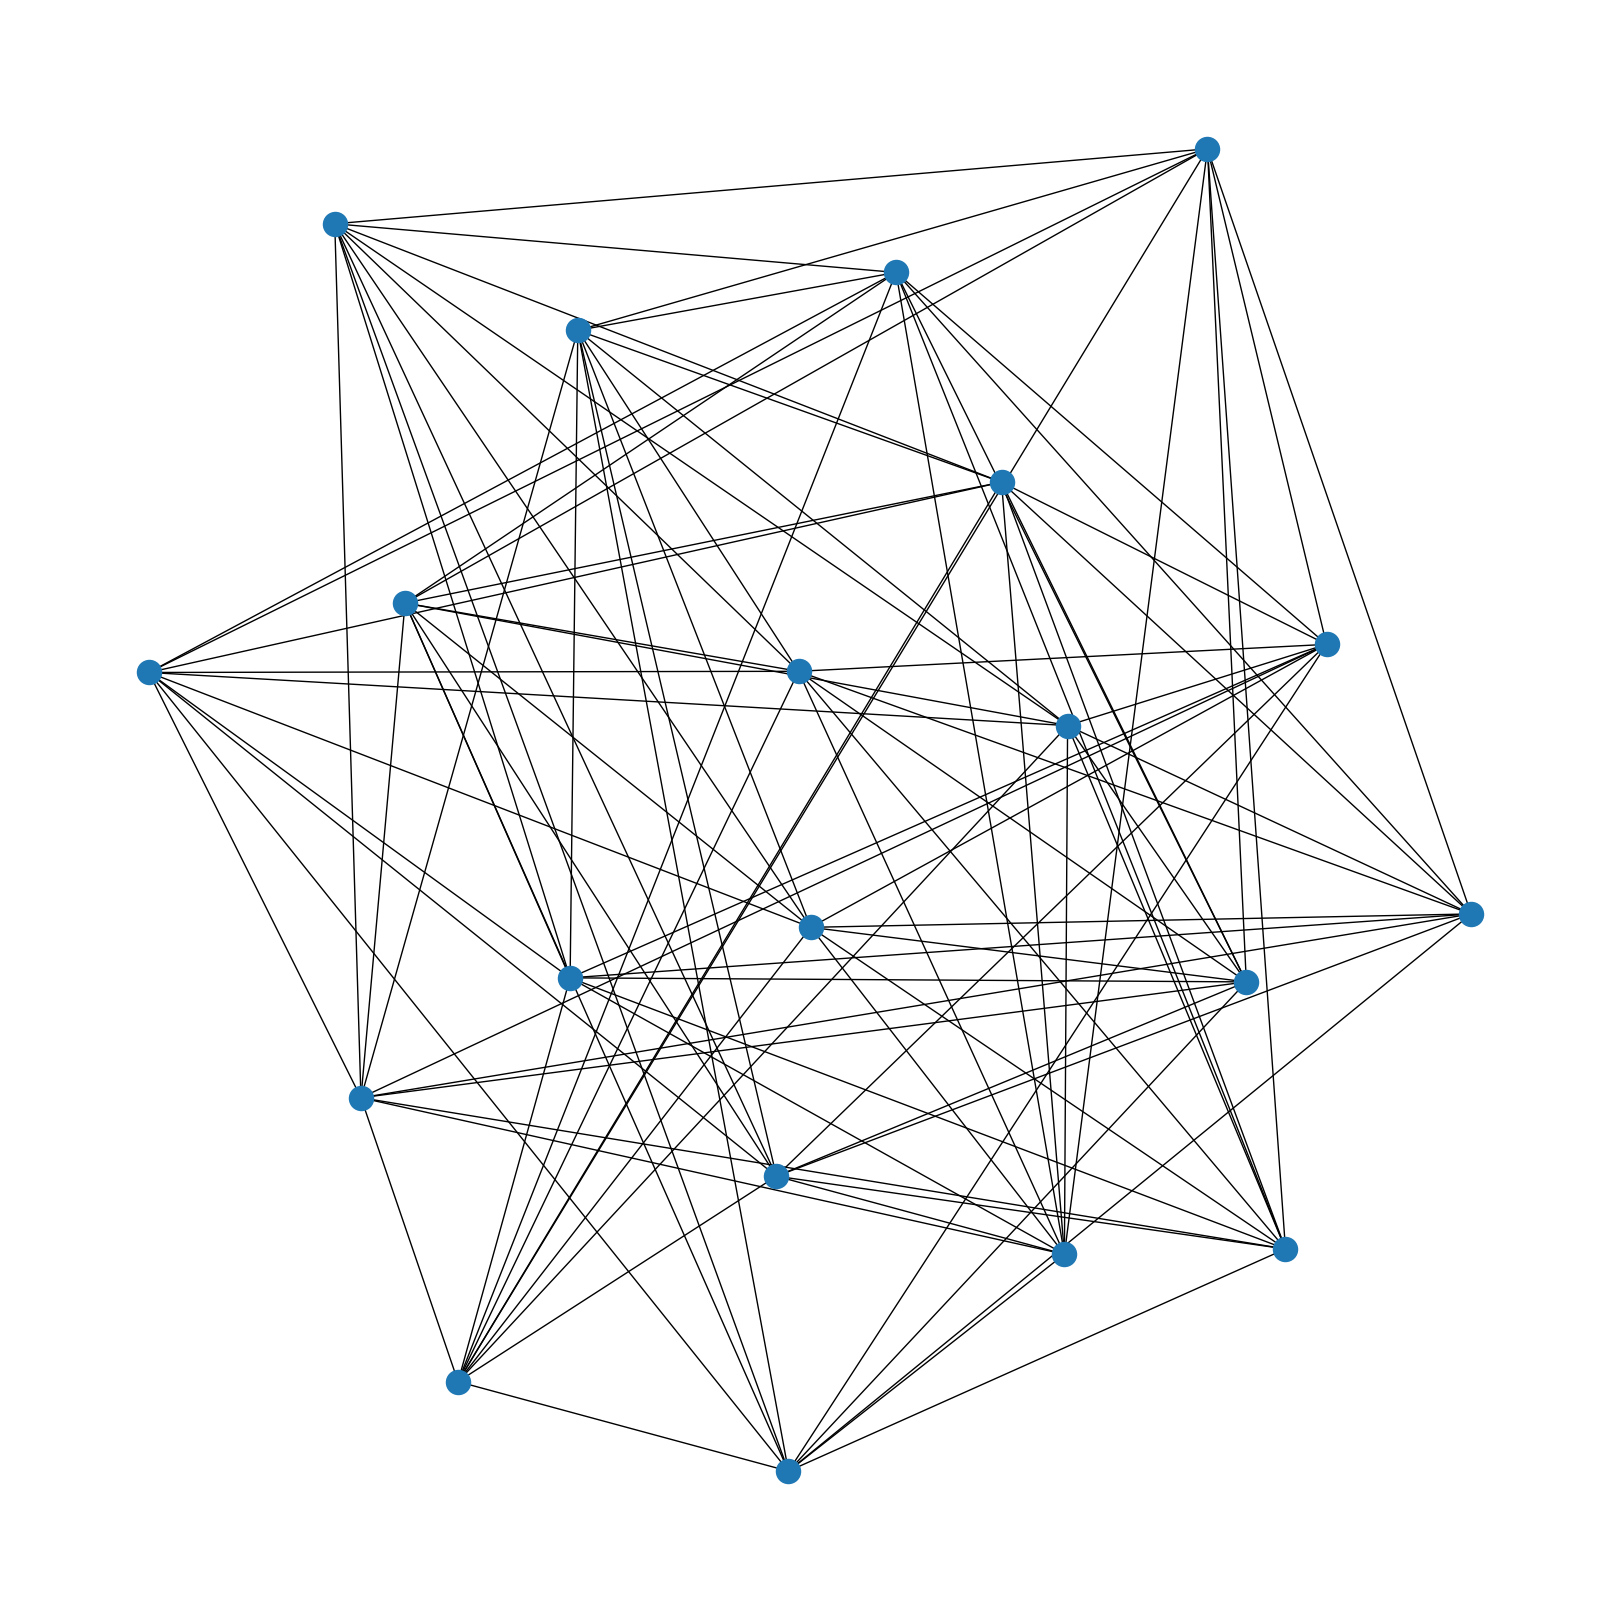

In [110]:
plt.figure(figsize=(16,16))
nx.draw(sim_G)

In [111]:
print(sim_G.nodes())

most_similar

ms_value = similarity_matrix.max(axis=1)
ms_value

y_tick = ['Topic-{}'.format(x+1) for x in range(10)]
x_tick = ['Topic-{}'.format(x+1) for x in range(10)]

sns.set(font_scale=2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [112]:
# Second VS Third Wave

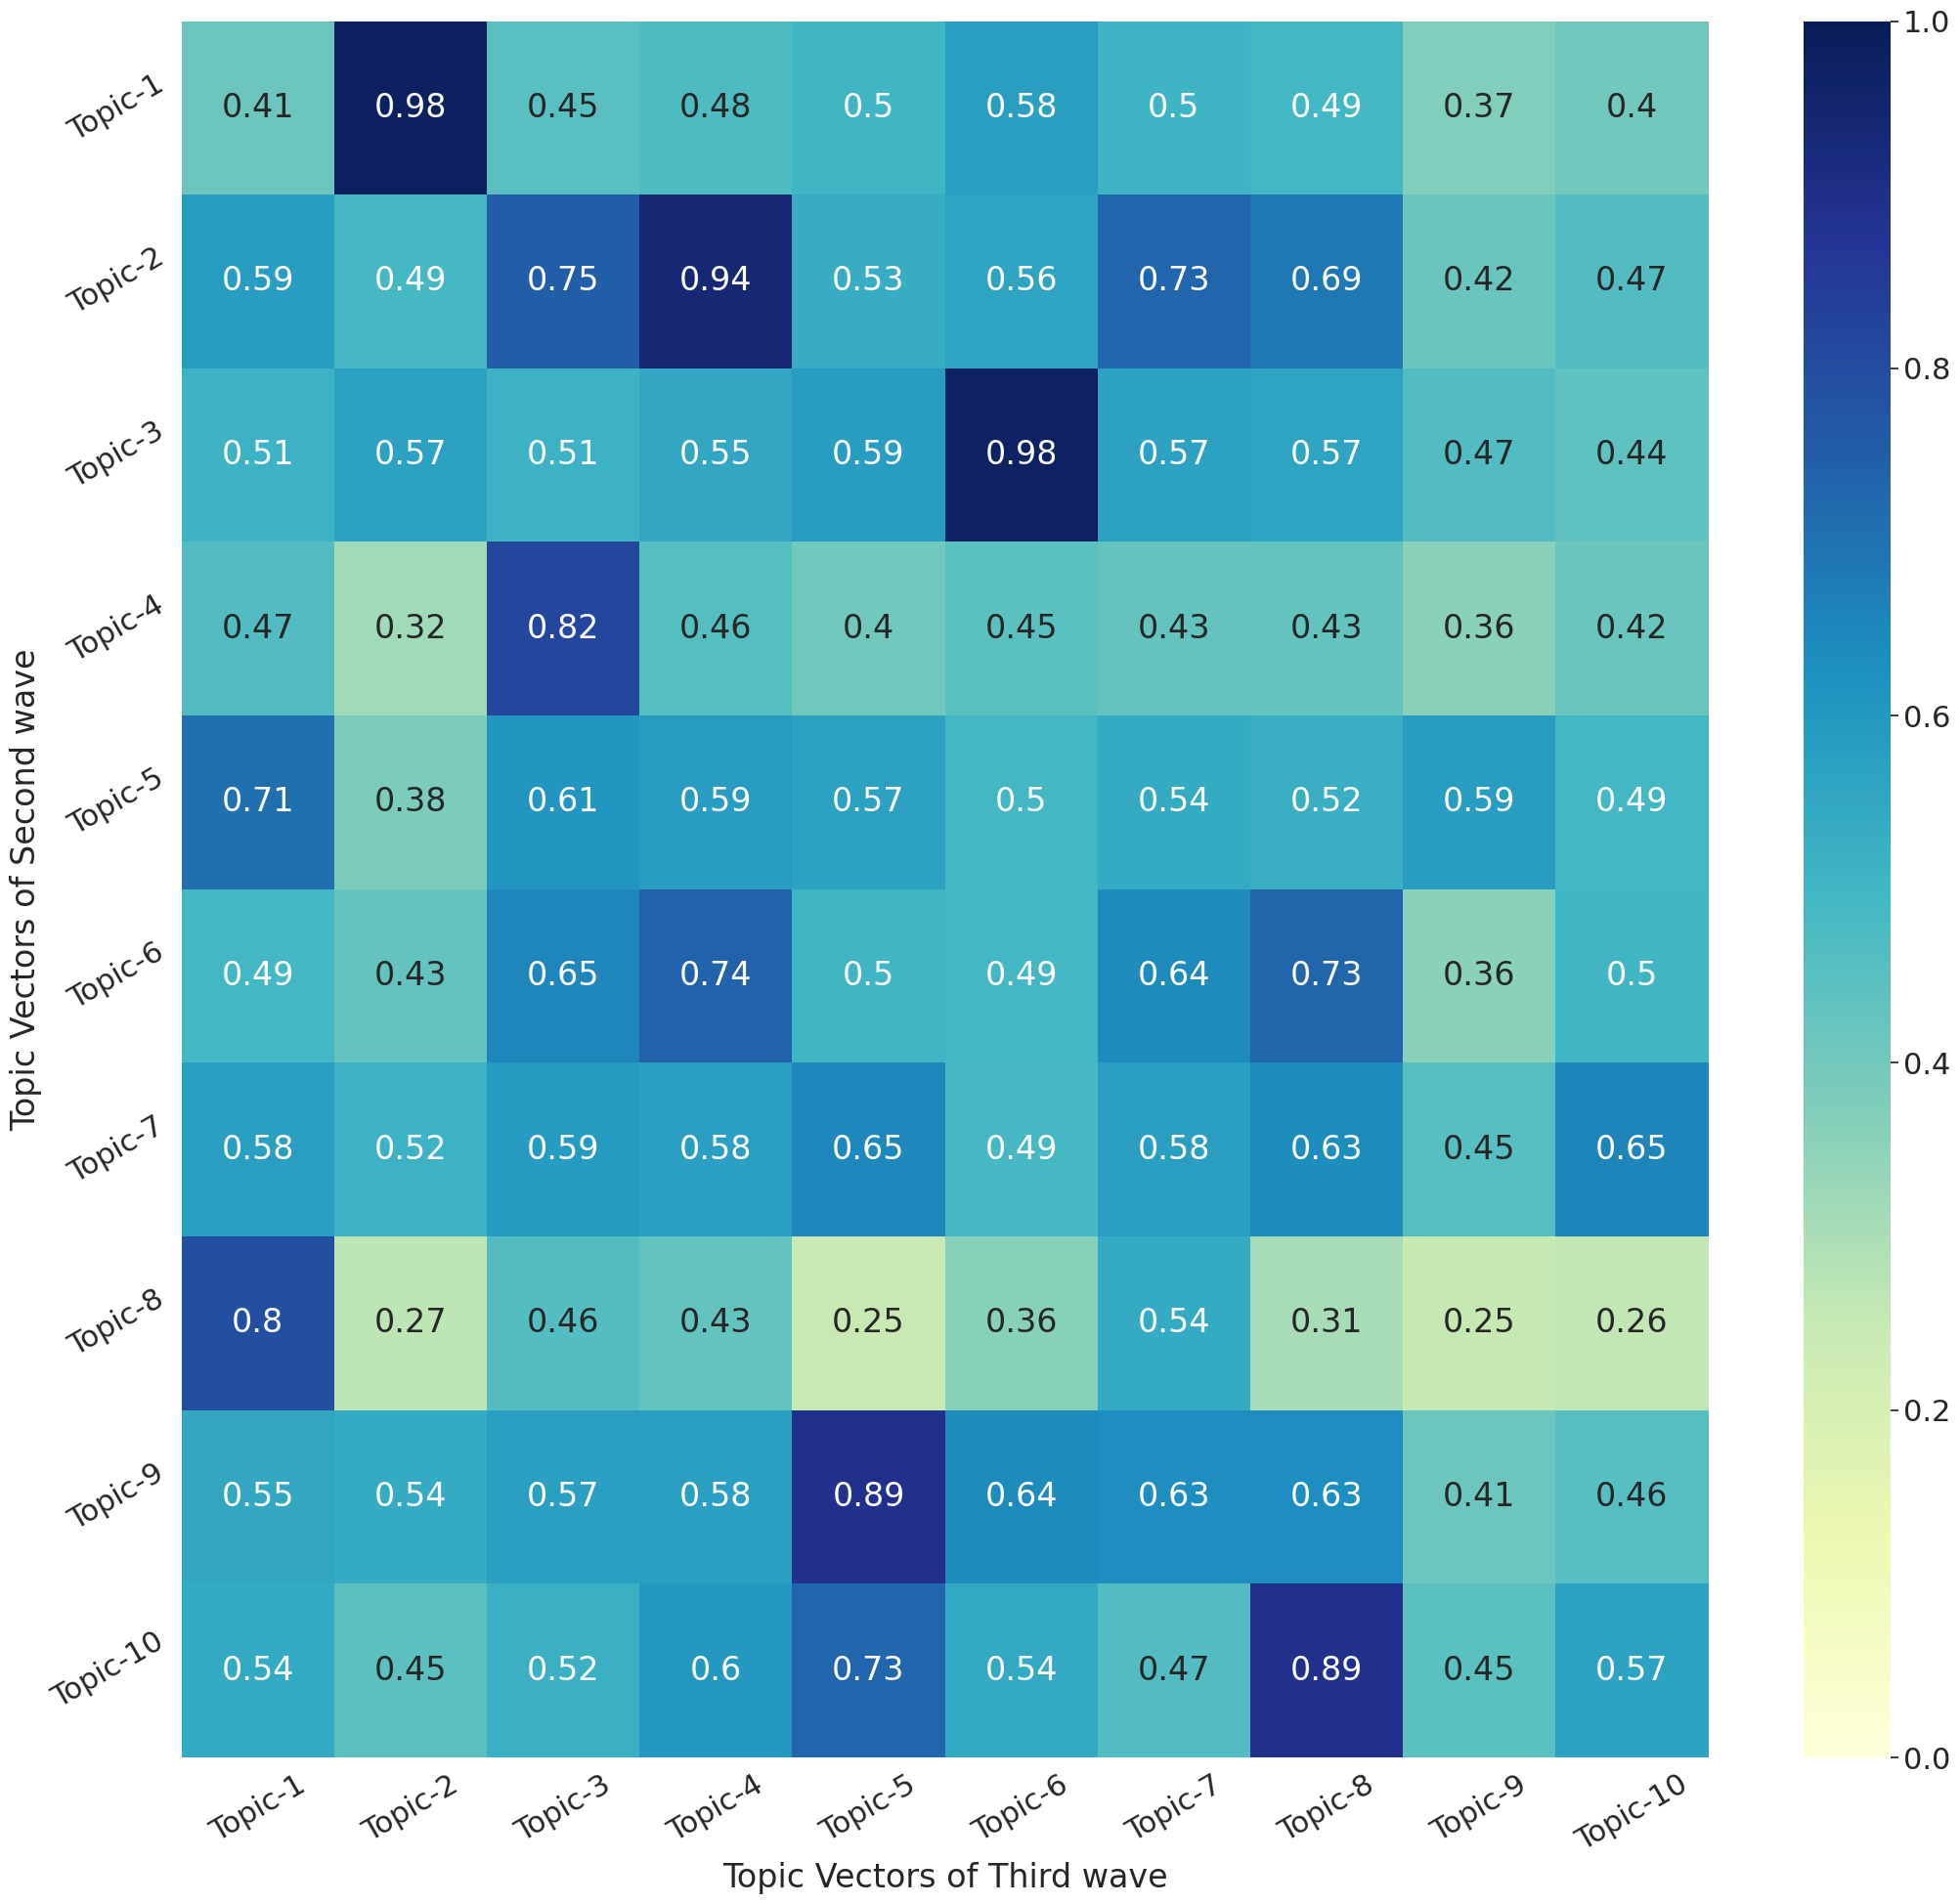

In [113]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of Second wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [114]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = False
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [115]:
words_secondwave, _, _= get_words(model_second_reduced, 10, model_second_reduced.get_num_topics())
words_thirdwave, _, _ = get_words(model_third_reduced, 10, model_third_reduced.get_num_topics())
words_secondwave

array([['pandemic', 'quarantine', 'flu', 'risk', 'crisis', 'virus',
        'vaccinated', 'vaccine', 'vaccination', 'vaccines'],
       ['vaccine', 'vaccines', 'vaccinated', 'vaccination', 'jab', 'flu',
        'immunity', 'quarantine', 'pandemic', 'pfizer'],
       ['lockdown', 'safe', 'bad', 'safety', 'pandemic', 'restrictions',
        'far', 'stay', 'stop', 'really'],
       ['good', 'happy', 'bad', 'huge', 'forget', 'enough', 'really',
        'wrong', 'smiling', 'hope'],
       ['nhs', 'nurses', 'hospital', 'patients', 'tories', 'care', 'dr',
        'medical', 'health', 'workers'],
       ['deaths', 'died', 'death', 'pandemic', 'flu', 'crisis', 'lives',
        'vaccinated', 'enough', 'quarantine'],
       ['vaccinated', 'vaccines', 'vaccine', 'vaccination', 'immunity',
        'flu', 'jab', 'quarantine', 'pandemic', 'virus'],
       ['vaccination', 'vaccinated', 'vaccine', 'vaccines', 'jab', 'flu',
        'nhs', 'quarantine', 'pandemic', 'coronavirus'],
       ['tests', 'testi

In [116]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [117]:
df3 = pd.DataFrame({"Topics of Second Wave":[','.join(list(x)) for x in words_second], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df3

,Topics of Second Wave,Most Similar topics in Third Wave,Similarity Score
0,"vaccines,vaccine,vaccination,vaccinated,jab,fl...","vaccines,vaccinated,vaccine,vaccination,unvacc...",0.981413
1,"tories,brexit,boris,tory,bbc,nhs,parliament,go...","scotland,brexit,sturgeon,boris,wales,nhs,parli...",0.937796
2,"pandemic,quarantine,flu,risk,virus,crisis,vacc...","pandemic,flu,unvaccinated,virus,vaccinated,ris...",0.976243
3,"lockdown,safe,restrictions,safety,bad,pandemic...","lockdown,restrictions,twitter,misinformation,t...",0.819684
4,"smiling,happy,monday,masks,yesterday,mask,joy,...","ha,sick,shit,terrified,really,bad,hope,wrong,g...",0.706674
5,"tories,govt,tory,nhs,government,really,wrong,e...","scotland,brexit,sturgeon,boris,wales,nhs,parli...",0.738369
6,"test,testing,tests,study,positive,nhs,update,c...","school,teachers,classrooms,schools,teaching,pu...",0.654856
7,"bad,happy,good,wrong,enough,huge,forget,really...","ha,sick,shit,terrified,really,bad,hope,wrong,g...",0.796614
8,"deaths,death,died,pandemic,flu,vaccinated,vacc...","deaths,hospitals,flu,patients,hospital,death,p...",0.892395
9,"nhs,nurses,hospital,patients,tories,workers,ca...","nhs,hospital,hospitals,sick,uk,patient,flu,pat...",0.894288


In [118]:
df3.to_csv('df3.csv')

In [119]:
# First VS Third wave

In [120]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

ms_value = similarity_matrix.max(axis=1)

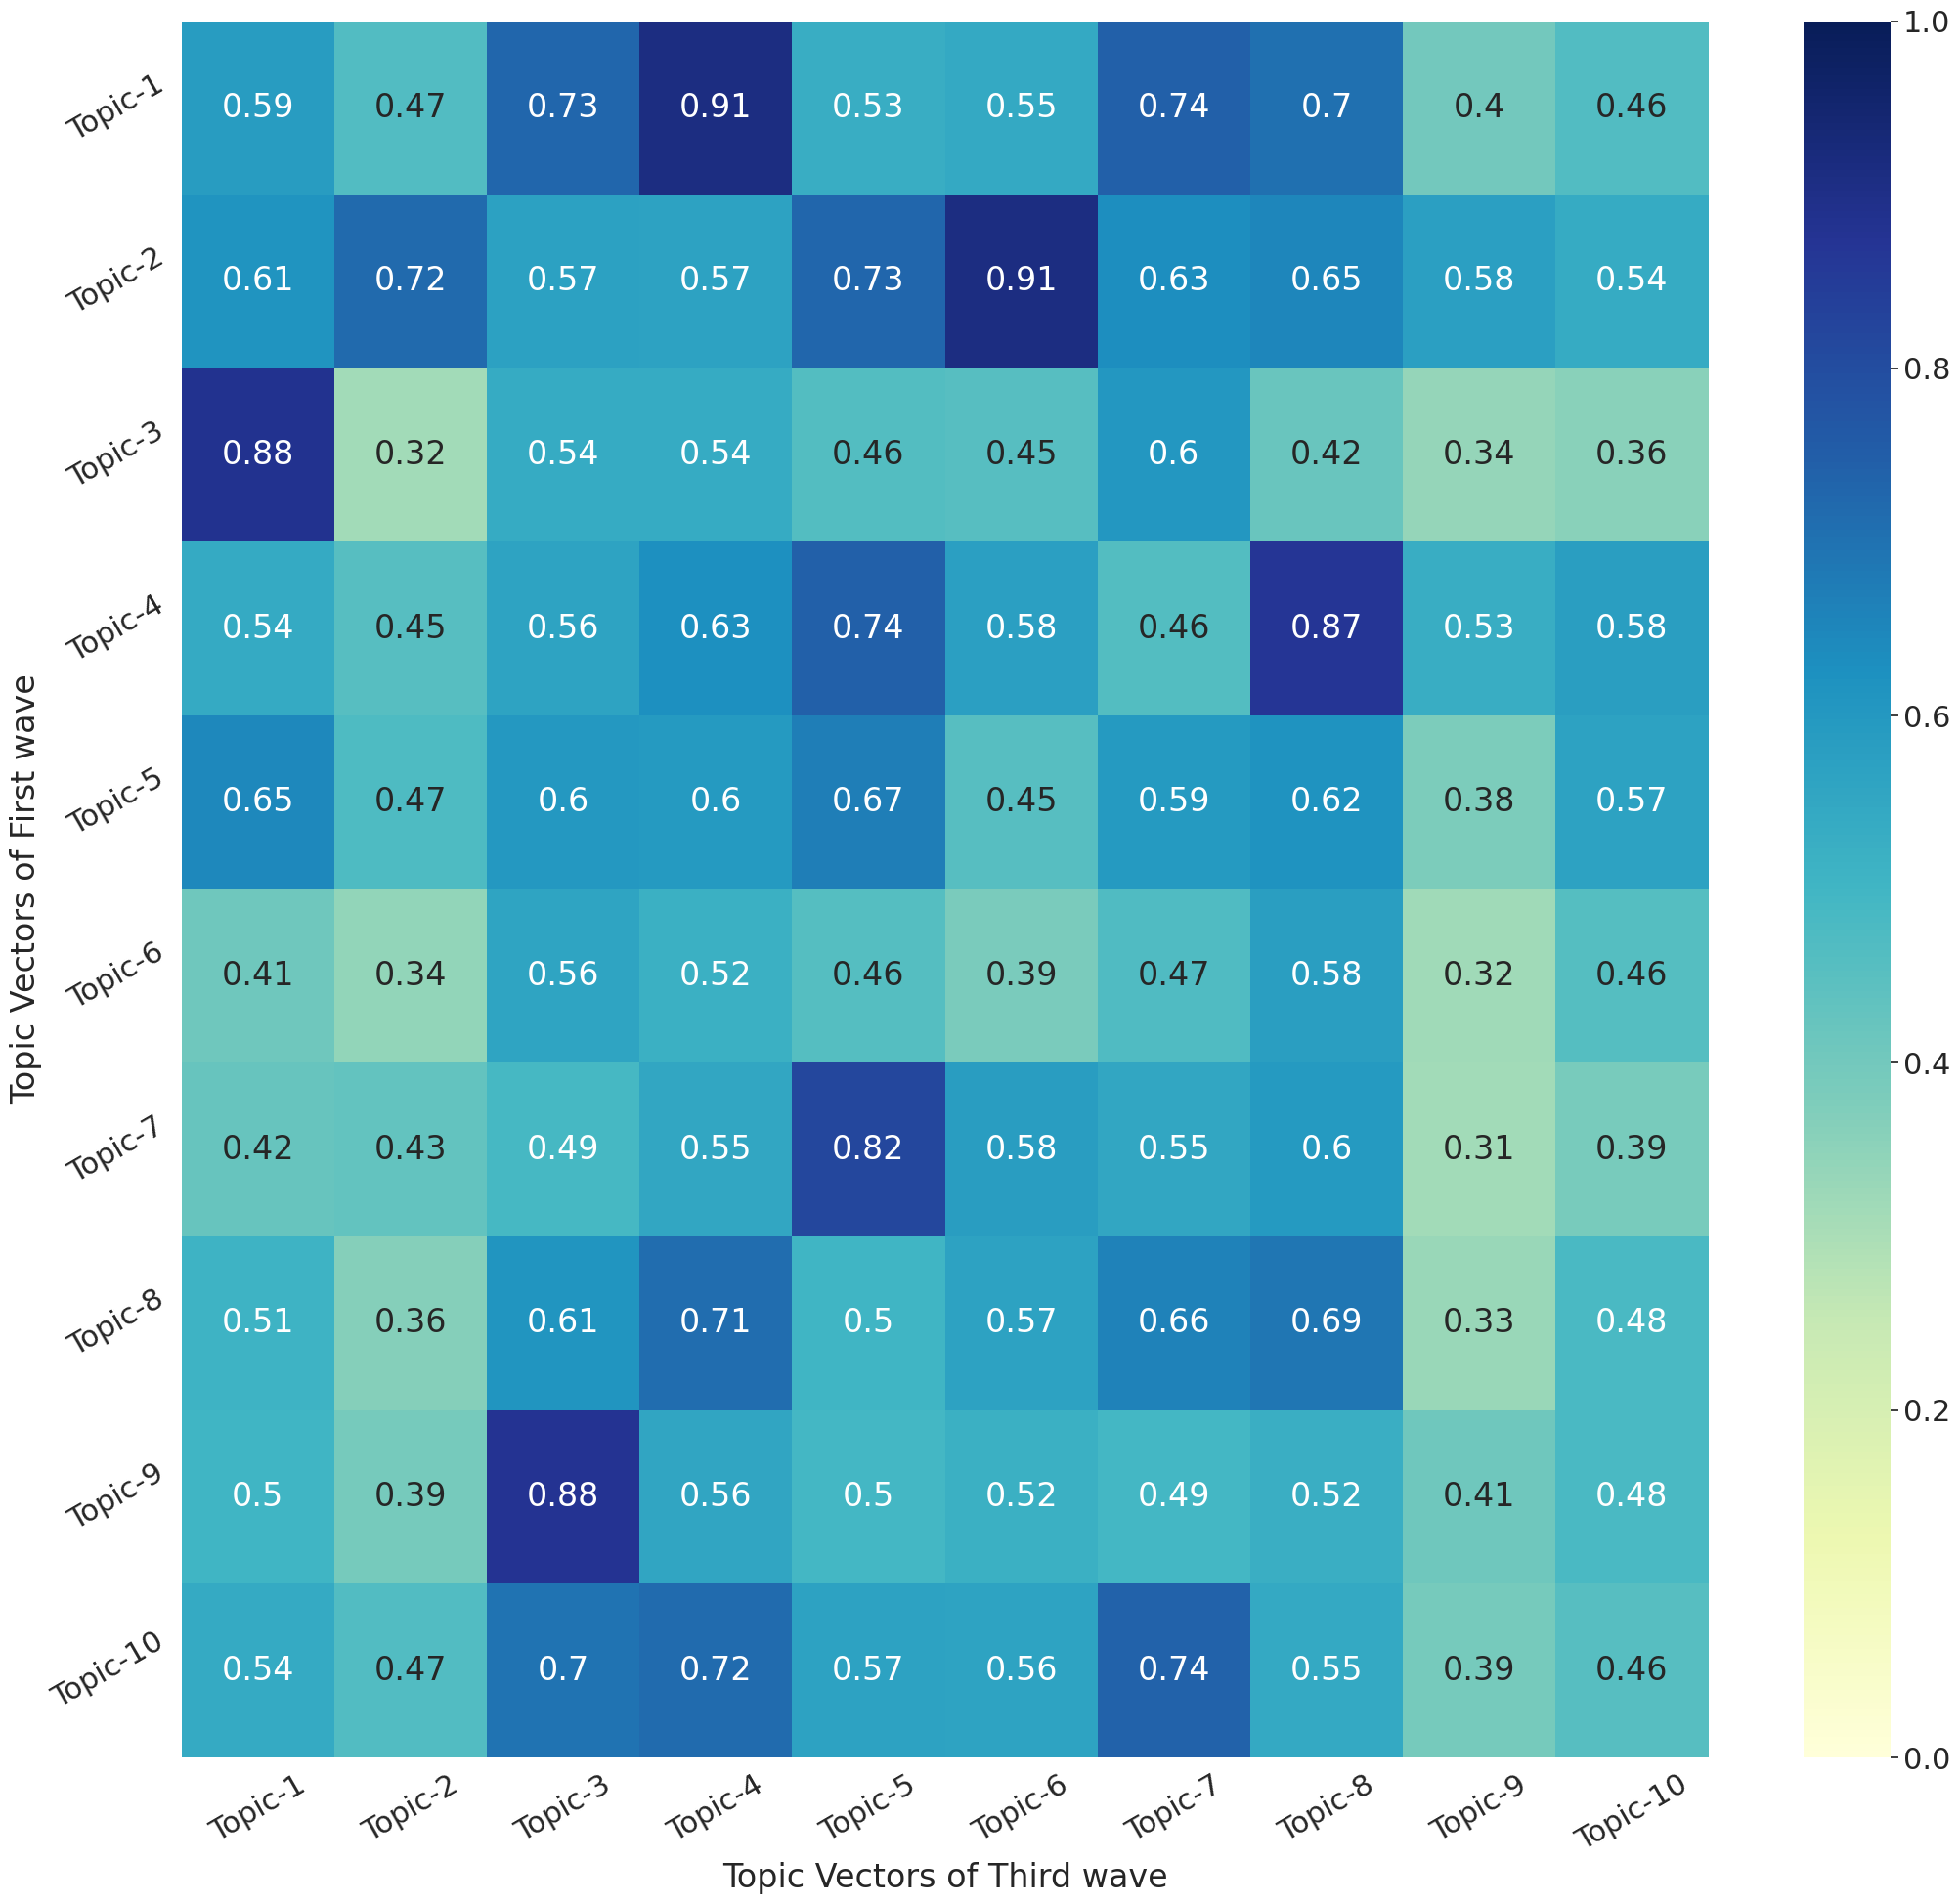

In [121]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [122]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [123]:
df2 = pd.DataFrame({"Topics of First Wave":[','.join(list(x)) for x in words_first], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df2.to_csv('df2.csv')
df2

,Topics of First Wave,Most Similar topics in Third Wave,Similarity Score
0,"boris,brexit,tory,bbc,nhs,govt,trump,governmen...","scotland,brexit,sturgeon,boris,wales,nhs,parli...",0.911341
1,"pandemic,outbreak,quarantine,flu,vaccine,virus...","pandemic,flu,unvaccinated,virus,vaccinated,ris...",0.911635
2,"hope,worst,good,really,enough,remember,feel,ye...","ha,sick,shit,terrified,really,bad,hope,wrong,g...",0.883937
3,"nhs,hospital,hospitals,workers,patients,emerge...","nhs,hospital,hospitals,sick,uk,patient,flu,pat...",0.871036
4,"tests,test,testing,tested,study,update,positiv...","deaths,hospitals,flu,patients,hospital,death,p...",0.669638
5,"support,enough,need,important,done,sure,update...","nhs,hospital,hospitals,sick,uk,patient,flu,pat...",0.579181
6,"deaths,death,died,die,pandemic,outbreak,flu,hi...","deaths,hospitals,flu,patients,hospital,death,p...",0.820015
7,"crisis,economy,govt,brexit,emergency,economic,...","scotland,brexit,sturgeon,boris,wales,nhs,parli...",0.711517
8,"lockdown,safe,restrictions,pandemic,emergency,...","lockdown,restrictions,twitter,misinformation,t...",0.876695
9,"trump,brexit,china,reported,worst,said,govt,qu...","misinformation,majority,shit,tweets,fact,wrong...",0.740235


In [124]:
# first second wave

In [125]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_secondwave.shape)

(10, 512) (10, 512)


In [126]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_secondwave)
most_similar = similarity_matrix.argmax(axis=1)

ms_value = similarity_matrix.max(axis=1)

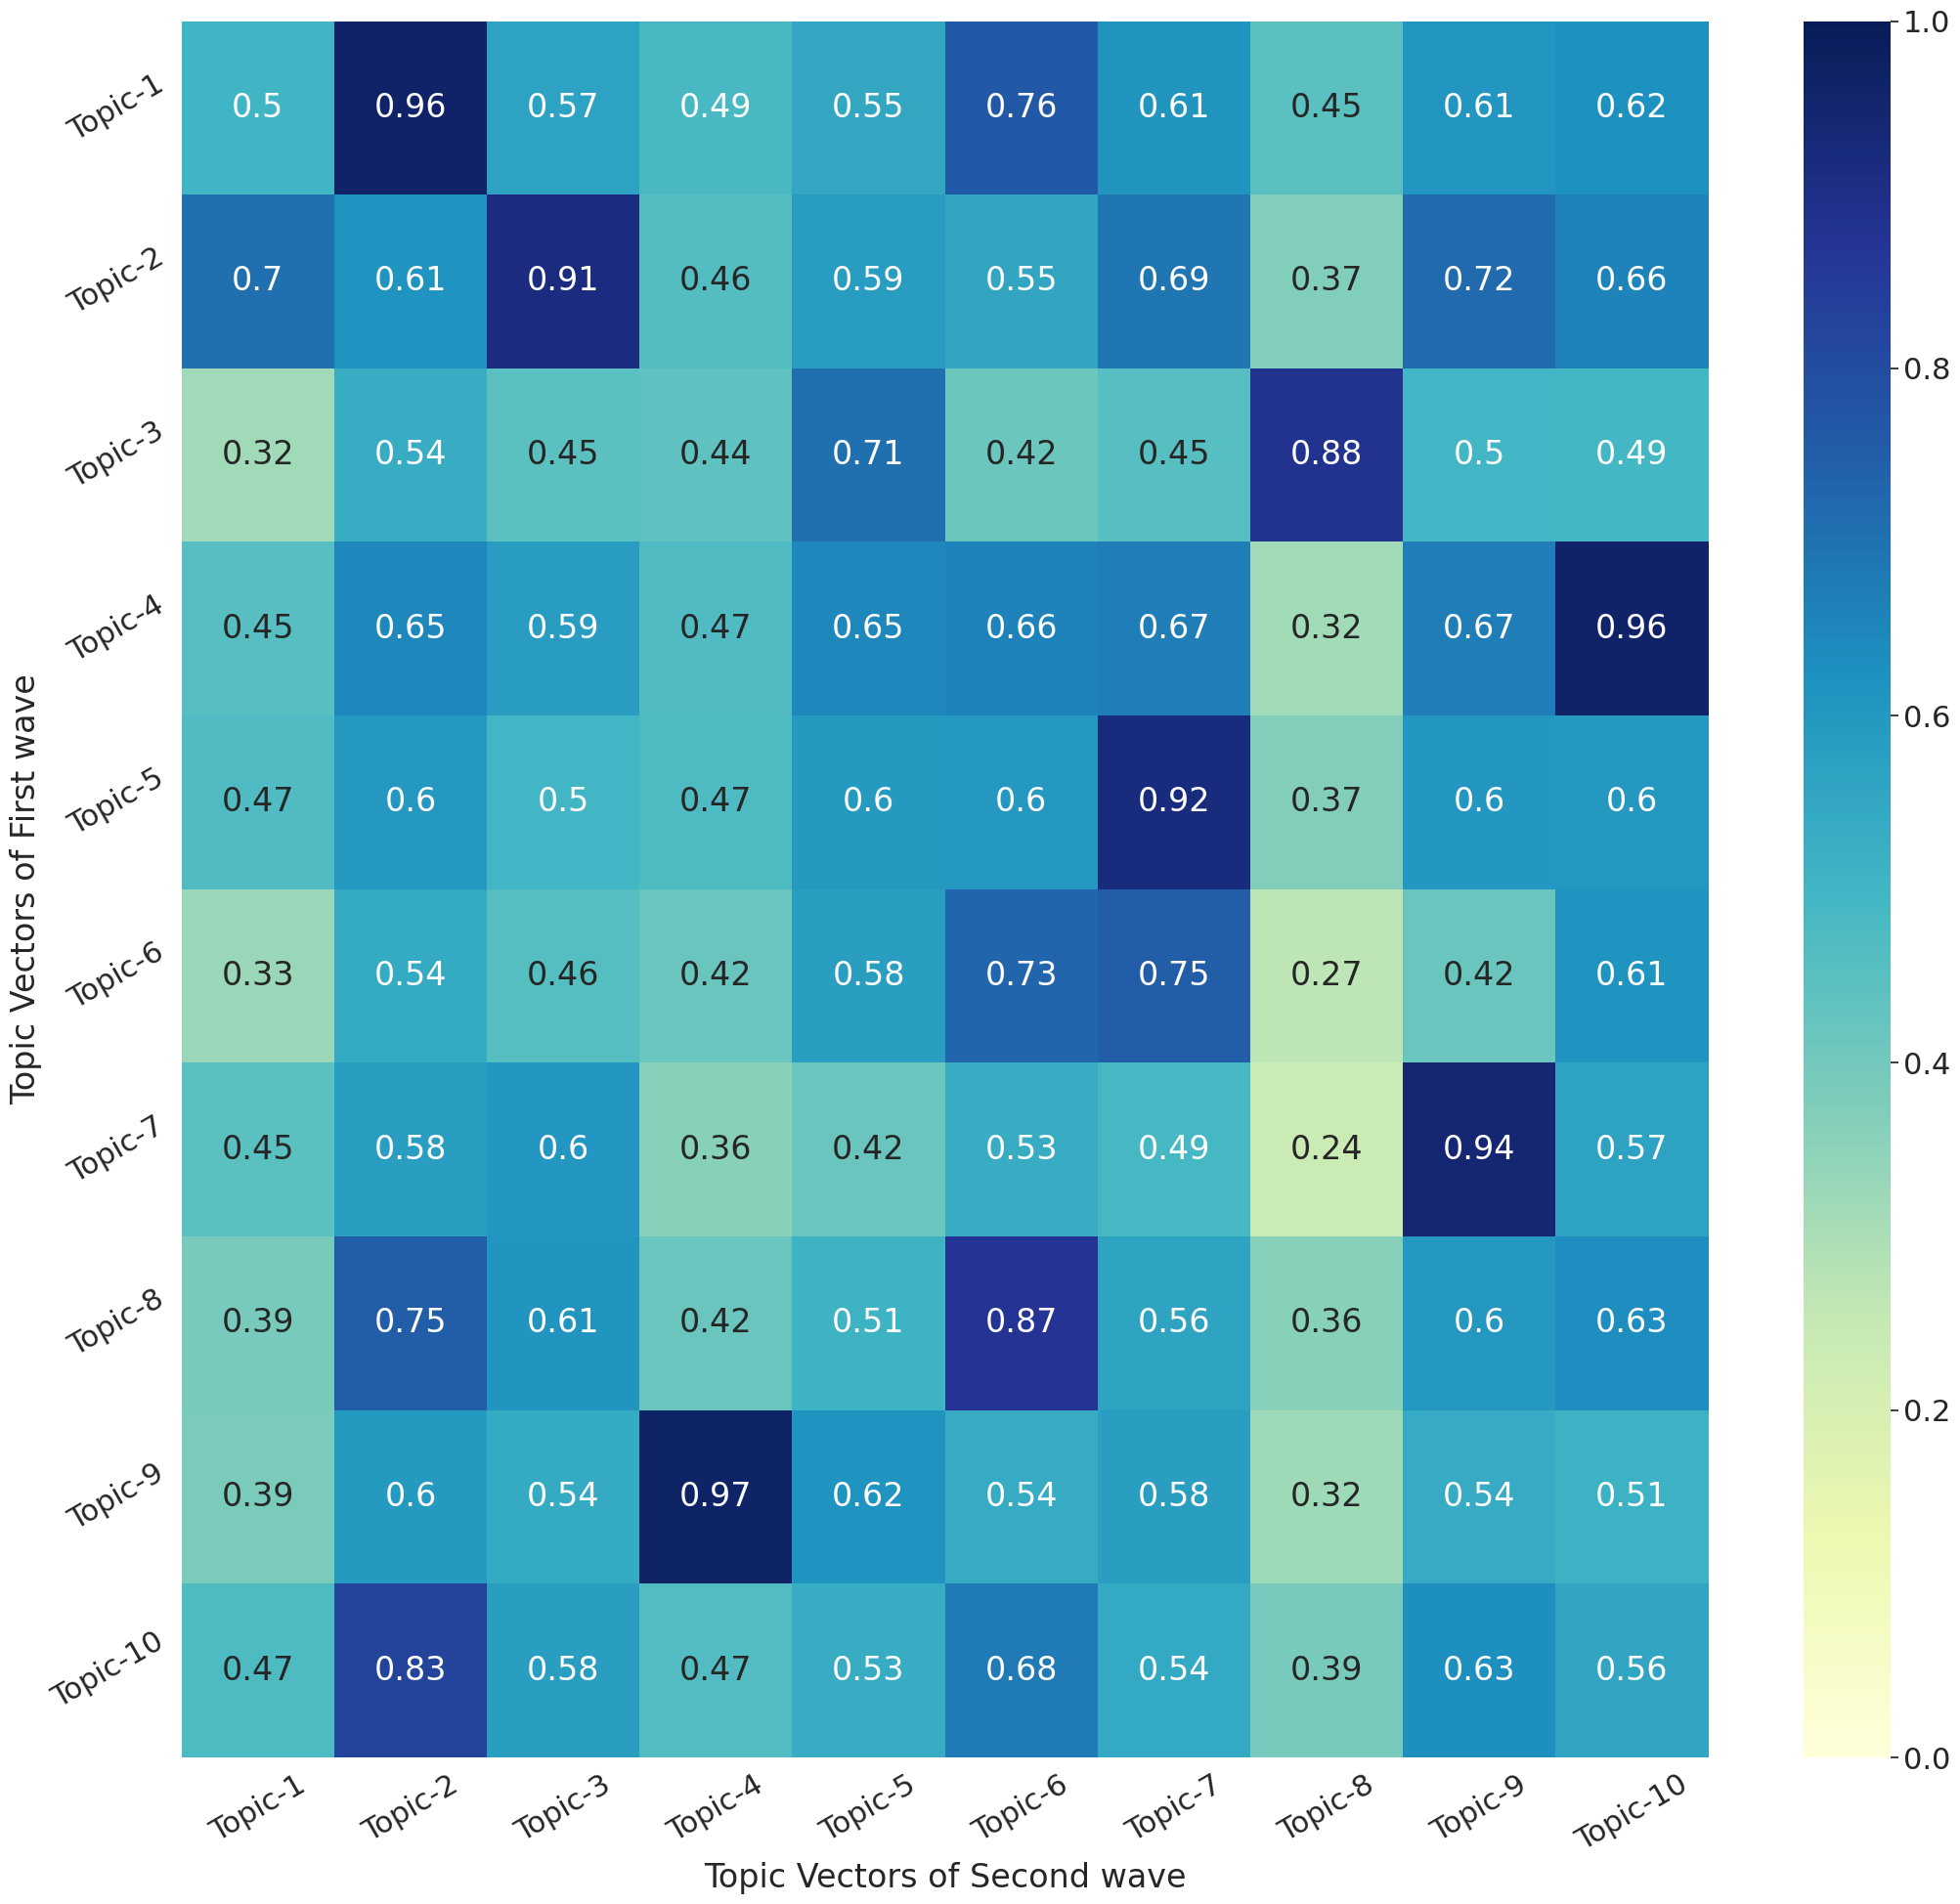

In [127]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Second wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [128]:
mstg = []
for x in most_similar:
  mstg.append(words_second[x])
len(mstg)

10

In [129]:
df1 = pd.DataFrame({"Topics of First Wave(top 10 words)":[','.join(list(x)) for x in words_first], "Most Similar topics in Second Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df1.to_csv('df1.csv')

In [130]:
df1

,Topics of First Wave(top 10 words),Most Similar topics in Second Wave,Similarity Score
0,"boris,brexit,tory,bbc,nhs,govt,trump,governmen...","tories,brexit,boris,tory,bbc,nhs,parliament,go...",0.961387
1,"pandemic,outbreak,quarantine,flu,vaccine,virus...","pandemic,quarantine,flu,risk,virus,crisis,vacc...",0.914252
2,"hope,worst,good,really,enough,remember,feel,ye...","bad,happy,good,wrong,enough,huge,forget,really...",0.884838
3,"nhs,hospital,hospitals,workers,patients,emerge...","nhs,nurses,hospital,patients,tories,workers,ca...",0.962491
4,"tests,test,testing,tested,study,update,positiv...","test,testing,tests,study,positive,nhs,update,c...",0.923521
5,"support,enough,need,important,done,sure,update...","test,testing,tests,study,positive,nhs,update,c...",0.752698
6,"deaths,death,died,die,pandemic,outbreak,flu,hi...","deaths,death,died,pandemic,flu,vaccinated,vacc...",0.944707
7,"crisis,economy,govt,brexit,emergency,economic,...","tories,govt,tory,nhs,government,really,wrong,e...",0.872993
8,"lockdown,safe,restrictions,pandemic,emergency,...","lockdown,safe,restrictions,safety,bad,pandemic...",0.966485
9,"trump,brexit,china,reported,worst,said,govt,qu...","tories,brexit,boris,tory,bbc,nhs,parliament,go...",0.828114


In [131]:
from google.colab import files
df1.to_csv('df1_UK.csv')
files.download('df1_UK.csv')

df2.to_csv('df2_UK.csv')
files.download('df2_UK.csv')

df3.to_csv('df3_UK.csv')
files.download('df3_UK.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>